In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list
import numpy as np

In [13]:
#load the datasets

socioeconomic_df = pd.read_csv("./Data/socioeconomic_dataset.csv")
health_burden_df = pd.read_csv("./Data/health_burden_dataset.csv")
risk_factors_df = pd.read_csv("./Data/risk_factor_dataset.csv")

In [14]:
# Standardize column names for consistency
socioeconomic_df.rename(columns={'Country': 'country', 'Year': 'year'}, inplace=True)
health_burden_df.rename(columns={'location': 'country'}, inplace=True)
risk_factors_df.rename(columns={'location': 'country'}, inplace=True)




In [16]:
# Step 2: Normalize text values for merging
socioeconomic_df['country'] = socioeconomic_df['country'].str.strip().str.lower()
health_burden_df['country'] = health_burden_df['country'].str.strip().str.lower()
risk_factors_df['country'] = risk_factors_df['country'].str.strip().str.lower()

In [17]:
# Step 3: Subset COPD-specific rows from burden and risk datasets
copd_burden_df = health_burden_df[
    health_burden_df['cause'].str.contains("chronic obstructive pulmonary disease", case=False)
].copy()

copd_risk_df = risk_factors_df[
    risk_factors_df['cause'].str.contains("chronic obstructive pulmonary disease", case=False)
].copy()


# copd_burden_df.to_csv("burden_risk.csv", index=False)

In [18]:
# Step 4: Pivot health burden data to wide format ---
burden_pivot = copd_burden_df.pivot_table(
    index=['country', 'year'],
    columns='measure',
    values='val',
    aggfunc='mean'
).reset_index()

# Fill NaN values with 0 and convert all numeric columns to integers
for col in burden_pivot.columns[2:]:  # Skip first three columns (country, year, measure)
    burden_pivot[col] = burden_pivot[col].fillna(0).astype(int)

# Rename risk_factor columns by flattening the MultiIndex (if any)
burden_pivot.columns.name = None  # Remove the column index name
burden_pivot = burden_pivot.rename(columns=lambda x: x.replace(" ", "_").lower() if isinstance(x, str) else x)

# Display the modified dataframe
print(burden_pivot.head())

# burden_pivot.to_csv("burden_risk.csv", index=False)

   country  year  dalys_(disability-adjusted_life_years)  deaths  incidence  \
0  algeria  2000                                   76462    2493      28242   
1  algeria  2001                                   78867    2558      29540   
2  algeria  2002                                   82146    2656      31153   
3  algeria  2003                                   85619    2775      32909   
4  algeria  2004                                   89019    2884      34679   

   prevalence  ylds_(years_lived_with_disability)  ylls_(years_of_life_lost)  
0      408840                               25101                      51360  
1      426458                               26172                      52695  
2      447935                               27464                      54682  
3      471288                               28878                      56740  
4      494937                               30304                      58715  


In [19]:

# Pivot the dataset to align risk factors as columns
risk_pivot = copd_risk_df.pivot_table(
    index=['country', 'year', 'measure'],
    columns='risk_factor',
    values='val',
    aggfunc='mean'
).reset_index()

# Fill NaN values with 0 and convert all numeric columns to integers
for col in risk_pivot.columns[3:]:  # Skip first three columns (country, year, measure)
    risk_pivot[col] = risk_pivot[col].fillna(0).astype(int)

# Rename risk_factor columns by flattening the multiindex
risk_pivot.columns.name = None  # Remove the column index name
risk_pivot = risk_pivot.rename(columns=lambda x: x.replace(" ", "_").lower() if isinstance(x, str) else x)

# Pivoting the 'measure' column to create separate columns for each measure
df_risk_wide = risk_pivot.pivot(index=["country", "year"], columns="measure")

# Flattening multi-level column names
df_risk_wide.columns = ['_'.join(col).strip() for col in df_risk_wide.columns.values]

# Resetting index to make 'country' and 'year' regular columns again
df_risk_wide.reset_index(inplace=True)

# Dictionary for renaming columns concisely
rename_dict = {
    "ambient_ozone_pollution_DALYs (Disability-Adjusted Life Years)": "ozone_DALY",
    "ambient_ozone_pollution_Deaths": "ozone_DTH",
    "ambient_ozone_pollution_YLDs (Years Lived with Disability)": "ozone_YLD",
    "ambient_ozone_pollution_YLLs (Years of Life Lost)": "ozone_YLL",
    "ambient_particulate_matter_pollution_DALYs (Disability-Adjusted Life Years)": "pm25_DALY",
    "ambient_particulate_matter_pollution_Deaths": "pm25_DTH",
    "ambient_particulate_matter_pollution_YLDs (Years Lived with Disability)": "pm25_YLD",
    "ambient_particulate_matter_pollution_YLLs (Years of Life Lost)": "pm25_YLL",
    "household_air_pollution_from_solid_fuels_DALYs (Disability-Adjusted Life Years)": "household_pollution_DALY",
    "household_air_pollution_from_solid_fuels_Deaths": "household_pollution_DTH",
    "household_air_pollution_from_solid_fuels_YLDs (Years Lived with Disability)": "household_pollution_YLD",
    "household_air_pollution_from_solid_fuels_YLLs (Years of Life Lost)": "household_pollution_YLL",
    "secondhand_smoke_DALYs (Disability-Adjusted Life Years)": "shs_DALY",
    "secondhand_smoke_Deaths": "shs_DTH",
    "secondhand_smoke_YLDs (Years Lived with Disability)": "shs_YLD",
    "secondhand_smoke_YLLs (Years of Life Lost)": "shs_YLL",
    "smoking_DALYs (Disability-Adjusted Life Years)": "smoking_DALY",
    "smoking_Deaths": "smoking_DTH",
    "smoking_YLDs (Years Lived with Disability)": "smoking_YLD",
    "smoking_YLLs (Years of Life Lost)": "smoking_YLL"
}

# Renaming columns
df_risk_wide.rename(columns=rename_dict, inplace=True)


df_risk_wide

# risk_pivot.to_csv("risk_pivot.csv", index=False)

country  year  ozone_DALY  ozone_DTH  ozone_YLD  ozone_YLL  pm25_DALY  \
0      algeria  2000        7397        370          0       7397      18436   
1      algeria  2001        7436        372          0       7436      18957   
2      algeria  2002        7089        354          0       7089      19589   
3      algeria  2003        7197        362          0       7197      20220   
4      algeria  2004        7528        380          0       7528      20763   
...        ...   ...         ...        ...        ...        ...        ...   
1183  zimbabwe  2017        2144         97          0       2144       3206   
1184  zimbabwe  2018        2161         97          0       2161       3147   
1185  zimbabwe  2019        2255        101          0       2255       3153   
1186  zimbabwe  2020        2338        105          0       2338       3370   
1187  zimbabwe  2021        2390        105          0       2390       3208   

      pm25_DTH  pm25_YLD  pm25_YLL  ...  household_pollution_YLD  \
0          626      5923     12513  ...                      231   
1          640      6159     12797  ...                      215   
2          659      6419     13170  ...                      195   
3          681      6686     13534  ...                      174   
4          698      6935     13827  ...                      153   
...        ...       ...       ...  ...                      ...   
1183       107       812      2393  ...                     6636   
1184       105       805      2341  ...                     6875   
1185       104       816      2337  ...                     7108   
1186       111       881      2488  ...                     7204   
1187       102       855      2352  ...                     7482   

      household_pollution_YLL  shs_DALY  shs_DTH  shs_YLD  shs_YLL  \
0                         465      6768      214     2291     4477   
1                         424      6985      220     2385     4600   
2                         382      7288      228     2507     4781   
3                         336      7612      239     2638     4973   
4                         290      7934      249     2774     5159   
...                       ...       ...      ...      ...      ...   
1183                    18292      2530       74      766     1764   
1184                    18715      2603       76      794     1808   
1185                    19061      2670       77      824     1846   
1186                    18998      2713       78      847     1866   
1187                    19253      2764       77      876     1887   

      smoking_DALY  smoking_DTH  smoking_YLD  smoking_YLL  
0            26109         1003         7020        19088  
1            26770         1020         7323        19447  
2            27734         1052         7672        20062  
3            28835         1086         8056        20779  
4            29823         1120         8426        21397  
...            ...          ...          ...          ...  
1183         13501          491         2777        10724  
1184         13824          499         2870        10954  
1185         14113          507         2963        11150  
1186         14225          507         3020        11205  
1187         14173          491         3064        11109  

[1188 rows x 22 columns]

In [20]:
# Step 6: Merge all datasets on 'country' and 'year' 
merged_df = socioeconomic_df.merge(burden_pivot, on=['country', 'year'], how='left')
merged_df = merged_df.merge(df_risk_wide, on=['country', 'year'], how='left')

# Preview the final merged dataset
print("Merged DataFrame shape:", merged_df.shape)
print(merged_df.head())

merged_df
merged_df.to_csv("merged_burden_risk.csv", index=False)

Merged DataFrame shape: (1134, 42)
   country       Sub-Region  year  Population  GDP PER CAPITA (USD)  \
0  algeria  Northern Africa  2000    30774621               1780.38   
1  algeria  Northern Africa  2001    31200985               1754.58   
2  algeria  Northern Africa  2002    31624696               1794.81   
3  algeria  Northern Africa  2003    32055883               2117.05   
4  algeria  Northern Africa  2004    32510186               2624.80   

   Area (Km2)  Population Density  Total CO2 Emission excluding LUCF (Mt)  \
0     2381741           12.921061                                   80.05   
1     2381741           13.100075                                   78.65   
2     2381741           13.277974                                   82.40   
3     2381741           13.459013                                   88.19   
4     2381741           13.649757                                   89.49   

   Nitrogen oxide  Sulphur dioxide  ...  household_pollution_YLD  \
0      

In [21]:
ch_dff = merged_df['country'].unique()
print(sorted(ch_dff))

len(ch_dff)

['algeria', 'angola', 'benin', 'botswana', 'burkina faso', 'burundi', 'cabo verde', 'cameroon', 'central african republic', 'chad', 'comoros', 'congo', "cote d'ivoire", 'democratic republic of congo', 'djibouti', 'egypt', 'equatorial guinea', 'eritrea', 'eswatini', 'ethiopia', 'gabon', 'gambia', 'ghana', 'guinea', 'guinea-bissau', 'kenya', 'lesotho', 'liberia', 'libya', 'madagascar', 'malawi', 'mali', 'mauritania', 'mauritius', 'morocco', 'mozambique', 'namibia', 'niger', 'nigeria', 'rwanda', 'sao tome and principe', 'senegal', 'seychelles', 'sierra leone', 'somalia', 'south africa', 'south sudan', 'sudan', 'tanzania', 'togo', 'tunisia', 'uganda', 'zambia', 'zimbabwe']


54

### Columns definition

**Country:** *Name of the country.*

**Sub-Region:** *Geographic sub‐region to which the country belongs.*

**Year:** *The calendar year for which the data is recorded.*

**Population:** *Total number of people residing in the country for that year.*

**GDP per Capita:** *Gross domestic product per person in the country for that year.*

**Area:** *Total land area of the country (likely in square kilometers).*

**Population Density:** *Number of people per unit area (e.g., population per square kilometer).*

**Total CO₂ Emission excluding LUCF:** *Total carbon dioxide emissions (in million tonnes), excluding those from land‐use change and forestry (LUCF).*

**Nitrogen Oxide:** *Annual nitrogen oxide (NOx) emissions (in tonnes).*

**Sulphur Dioxide:** *Annual sulfur dioxide (SO₂) emissions (in tonnes).*

**Carbon Monoxide:** *Annual carbon monoxide (CO) emissions (in tonnes).*

**NMVOC:** *Annual non‐methane volatile organic compound emissions (in tonnes).*

**Black Carbon:** *Annual black carbon emissions (in tonnes).*

**Ammonia:** *Annual ammonia (NH₃) emissions (in tonnes).*

**Chronic_Respiratory(RSD):** *Risk‐standardized death rate for chronic respiratory diseases recorded in 2019 only.*

**HAQ_Index (Healthcare Access and Quality Index):** *Composite score reflecting the coverage and quality of healthcare services recorded in 2019 only.*

**dalys_(disability-adjusted_life_years):** *Total disability‐adjusted life years lost to COPD (chronic obstructive pulmonary disease).*

**Deaths:** *Number of deaths attributable to COPD.*

**Incidence:** *Number of new COPD cases occurring during the specified year.*

**Prevalence:** *Total number of existing COPD cases (new or previously diagnosed) in that year.*

**ylds_(years_lived_with_disability):** *Years lived with disability due to COPD.*

**ylls_(years_of_life_lost):** *Years of life lost due to premature mortality from COPD.*

**ozone_DALY:** *Disability‐adjusted life years lost to COPD associated with ambient ozone pollution.*

**ozone_DTH:** *Number of COPD deaths attributed to ambient ozone pollution.*

**ozone_YLD:** *Years lived with disability due to COPD from ambient ozone pollution.*

**ozone_YLL:** *Years of life lost to COPD from ambient ozone pollution.*

**pm25_DALY:** *Disability‐adjusted life years lost to COPD from exposure to ambient PM2.5 (fine particulate matter).*

**pm25_DTH:** *Number of COPD deaths from ambient PM2.5 exposure.*

**pm25_YLD:** *Years lived with disability due to COPD from ambient PM2.5 exposure.*

**pm25_YLL:** *Years of life lost to COPD from ambient PM2.5 exposure.*

**household_pollution_DALY:** *Disability‐adjusted life years lost to COPD from household air pollution (solid fuels).*

**household_pollution_DTH:** *Number of COPD deaths from household air pollution (solid fuels).*

**household_pollution_YLD:** *Years lived with disability due to COPD from household air pollution (solid fuels).*

**household_pollution_YLL:** *Years of life lost to COPD from household air pollution (solid fuels).*

**shs_DALY:** *Disability‐adjusted life years lost to COPD from secondhand smoke.*

**shs_DTH:** *Number of COPD deaths attributed to secondhand smoke.*

**shs_YLD:** *Years lived with disability due to COPD from secondhand smoke.*

**shs_YLL:** *Years of life lost to COPD from secondhand smoke.*

**smoking_DALY:** *Disability‐adjusted life years lost to COPD from active smoking.*

**smoking_DTH:** *Number of COPD deaths attributable to active smoking.*

**smoking_YLD:** *Years lived with disability due to COPD from active smoking.*

**smoking_YLL:** *Years of life lost to COPD from active smoking.*

In [22]:
# Ensure proper year formatting
merged_df['year'] = merged_df['year'].astype(int)

# # Create DALYs Metric
# merged_df['DALYs'] = merged_df[['Deaths', 'YLLs (Years of Life Lost)', 'YLDs (Years Lived with Disability)']].sum(axis=1)

# merged_df.head()

In [23]:

#Missing Data Summary
# ----------------------------
missing_data_pct = (merged_df.isna().mean() * 100).sort_values(ascending=False)

print(missing_data_pct)

Chronic_Respiratory(RSD)                  73.192240
HAQ_Index                                 73.192240
GDP PER CAPITA (USD)                       2.380952
year                                       0.000000
Sub-Region                                 0.000000
Area (Km2)                                 0.000000
Population Density                         0.000000
Total CO2 Emission excluding LUCF (Mt)     0.000000
Population                                 0.000000
country                                    0.000000
Sulphur dioxide                            0.000000
Nitrogen oxide                             0.000000
Carbon Monoxide                            0.000000
NMVOCs                                     0.000000
Ammonia                                    0.000000
Black Carbon                               0.000000
dalys_(disability-adjusted_life_years)     0.000000
deaths                                     0.000000
incidence                                  0.000000
prevalence  

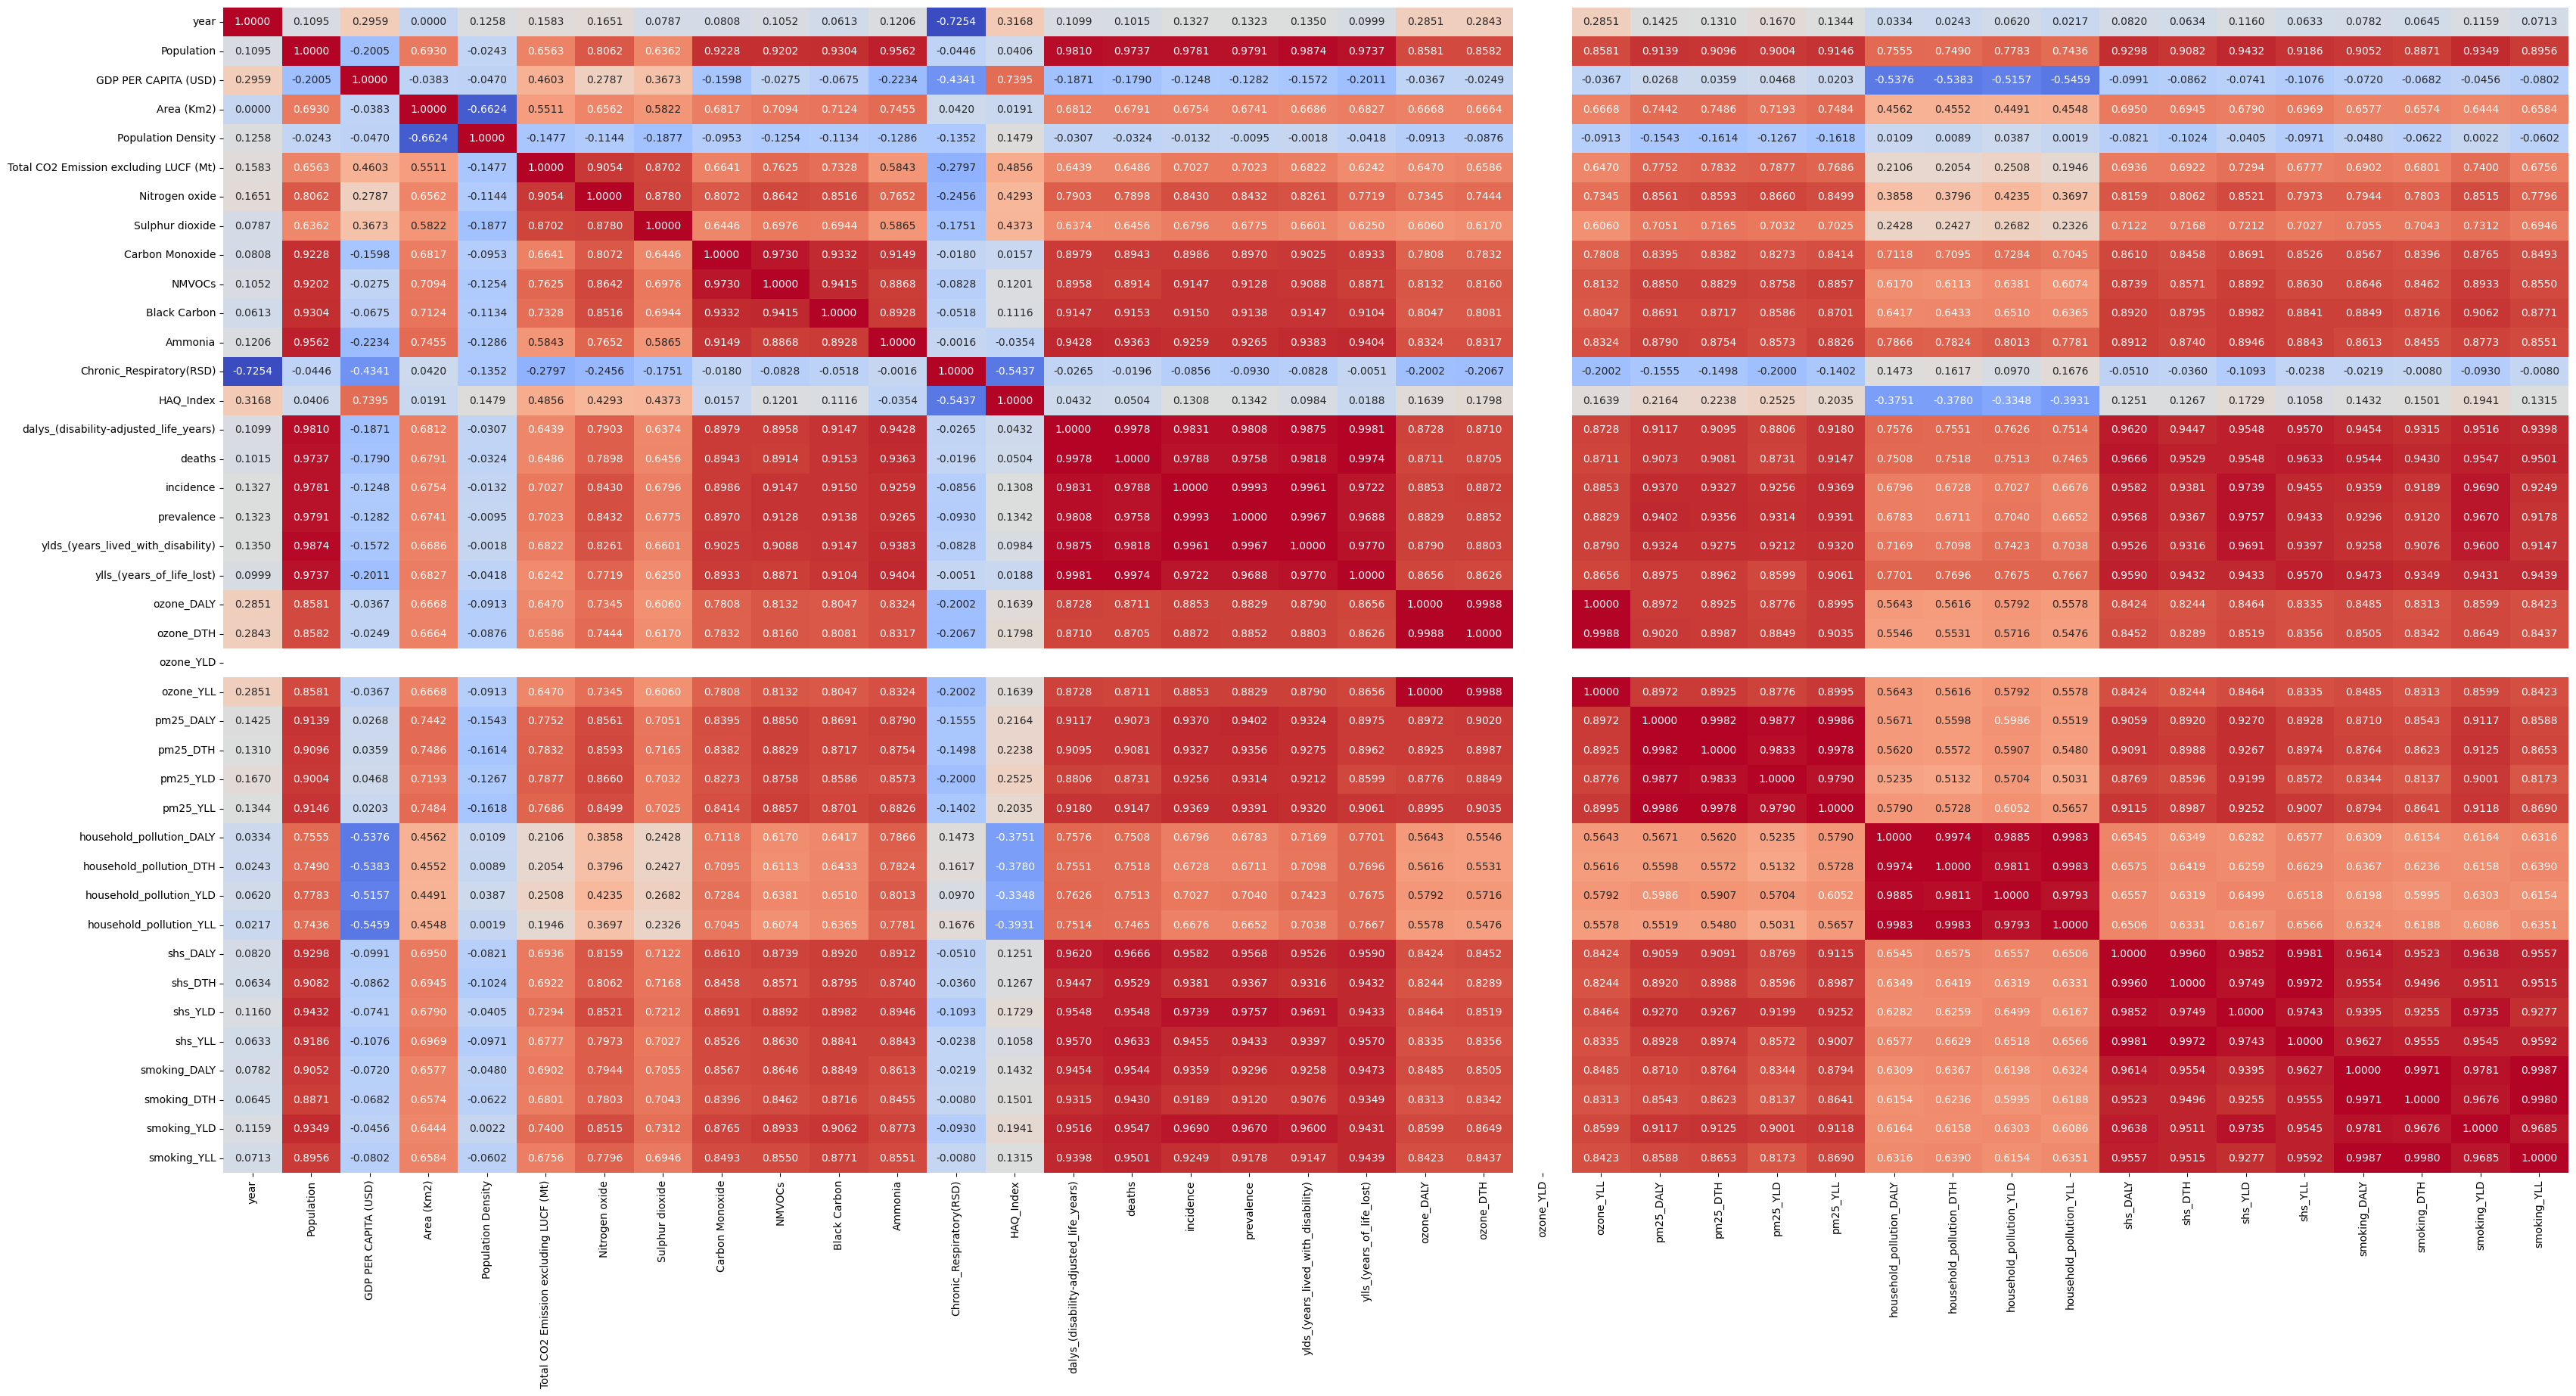

In [24]:
# Correlation Matrix of the entire dataset
eda_numeric = merged_df.select_dtypes(include=['float64', 'int64'])
eda_corr = eda_numeric.corr(method='spearman')

# Plot heatmap
fig, ax = plt.subplots(figsize=(40, 20))
sns.heatmap(eda_corr, annot=True, fmt='.4f', 
            cmap='coolwarm', cbar=False, ax=ax)

# Adjust y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Save figure
#plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

##############################################################################
### Formulas & Explanations
##############################################################################

#### 1) Pearson Correlation Coefficient r(X,Y):
#####       r(X,Y) = Cov(X,Y) / (StdDev(X) * StdDev(Y))
#####       where Cov(X,Y) = E[(X - E[X]) * (Y - E[Y])]
#####       By default, df.corr() in pandas uses Pearson correlation.

#### 2) Distance for Hierarchical Clustering (for reordering):
#####       distance = 1 - |r|
#####       Here, r is the correlation between two variables.
#####       We take the absolute value |r| so that strongly
#####       positive or negative correlations produce small distances
#####       and thus get clustered together.

#### 3) Hierarchical Clustering:
#####       Z = linkage(distance_matrix, method="ward")
#####       This uses Ward's method (minimizing variance within clusters)
#####       to cluster variables based on the distance metric above.

In [25]:


# 1) Normalization Function
##############################################################################
def normalize_decade_columns(df, cols_to_normalize, method="zscore"):
    """
    Normalizes specified columns in-place.
    By default (method="zscore"), each column is transformed: z = (x - mean)/std
    If method="minmax", it uses (x - min)/(max - min).
    """
    for col in cols_to_normalize:
        if col not in df.columns:
            continue
        series = df[col].dropna()
        if series.empty or series.std() == 0:
            # Skip columns that are constant or empty
            continue

        if method == "zscore":
            mean_val = series.mean()
            std_val = series.std()
            df[col] = df[col].apply(
                lambda x: (x - mean_val) / std_val if pd.notnull(x) else x
            )
        elif method == "minmax":
            min_val, max_val = series.min(), series.max()
            df[col] = df[col].apply(
                lambda x: (x - min_val) / (max_val - min_val) if pd.notnull(x) else x
            )
    return df



# 2) Hierarchical Clustering + Plot
##############################################################################
def cluster_and_plot_corr(df_sub, title="Correlation Heatmap", vmin=-1, vmax=1):
    """
    1) Drops rows with NaNs.
    2) Drops constant columns.
    3) Computes Spearman correlation => corr.
    4) Converts correlation to distance = 1 - |r|.
    5) Performs Ward's hierarchical clustering.
    6) Reorders correlation matrix accordingly and plots an annotated heatmap
       using a 'coolwarm' diverging colormap.
    """
    # Drop rows with NaNs (in the relevant columns)
    df_clean = df_sub.dropna(axis=0)
    if df_clean.empty:
        warnings.warn(f"'{title}' skipped (no valid rows after dropping NaNs).")
        return

    # Drop constant columns (std=0)
    constant_cols = [c for c in df_clean.columns if df_clean[c].std() == 0]
    if constant_cols:
        df_clean.drop(columns=constant_cols, inplace=True)

    if df_clean.shape[1] < 2:
        warnings.warn(f"'{title}' skipped (fewer than 2 columns remain).")
        return

    # Calculate Spearman correlation
    corr = df_clean.corr(method="spearman")

    # Convert correlation to distance
    distance_matrix = 1 - np.abs(corr.values)
    # Replace non-finite with 0
    distance_matrix[~np.isfinite(distance_matrix)] = 0

    # Perform hierarchical clustering
    try:
        Z = linkage(distance_matrix, method="ward")
    except ValueError as e:
        warnings.warn(f"Clustering failed for '{title}': {e}")
        return

    # Determine optimal ordering
    optimal_order = leaves_list(Z)

    # Reorder correlation matrix
    corr_reordered = corr.values[optimal_order][:, optimal_order]
    col_labels = corr.columns[optimal_order]

    # PLOT
    plt.figure(figsize=(18, 8))
    plt.imshow(corr_reordered, vmin=vmin, vmax=vmax, cmap="coolwarm")
    cbar = plt.colorbar()
    cbar.set_label("Spearman Correlation Coefficient")

    plt.xticks(range(len(col_labels)), col_labels, rotation=90)
    plt.yticks(range(len(col_labels)), col_labels)

    # Annotate each cell
    for i in range(len(col_labels)):
        for j in range(len(col_labels)):
            val = corr_reordered[i, j]
            plt.text(j, i, f"{val:.2f}", ha="center", va="center", fontsize=7)

    plt.title(title)
    plt.tight_layout()
    plt.show()




<h2 style='text-align: Center;'> Correlation Plots </h2>

    
<h3> MultiYear Correlation Plots no HAQ and RSD </h2>
</p>


> <p> The Correlation Plots below is taking away RSD and HAQ. Also to improve clarity, the correlation plots were done by subsets, which are defined in the code below
> MULTI-YEAR CORRELATIONS (NO HAQ & RSD): Produces 9 correlation plots ignoring HAQ_Index and RSD entirely, so we can use the entire timeseries data across all years.



</p>   

/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/299378978.py:69: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


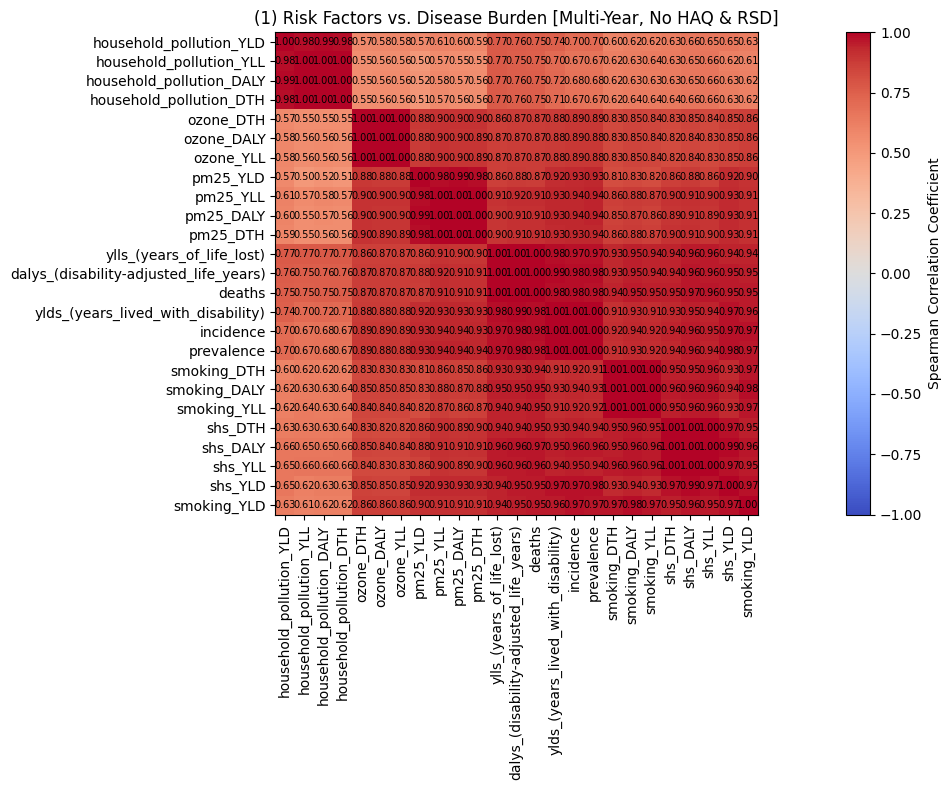

/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/299378978.py:69: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


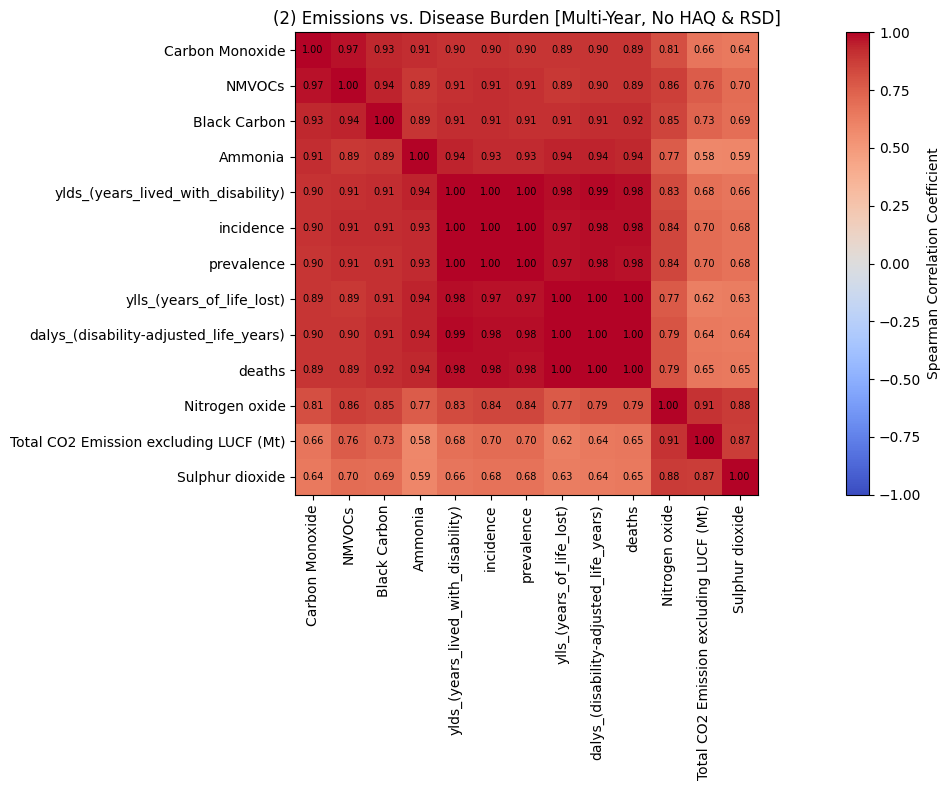

/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/299378978.py:69: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


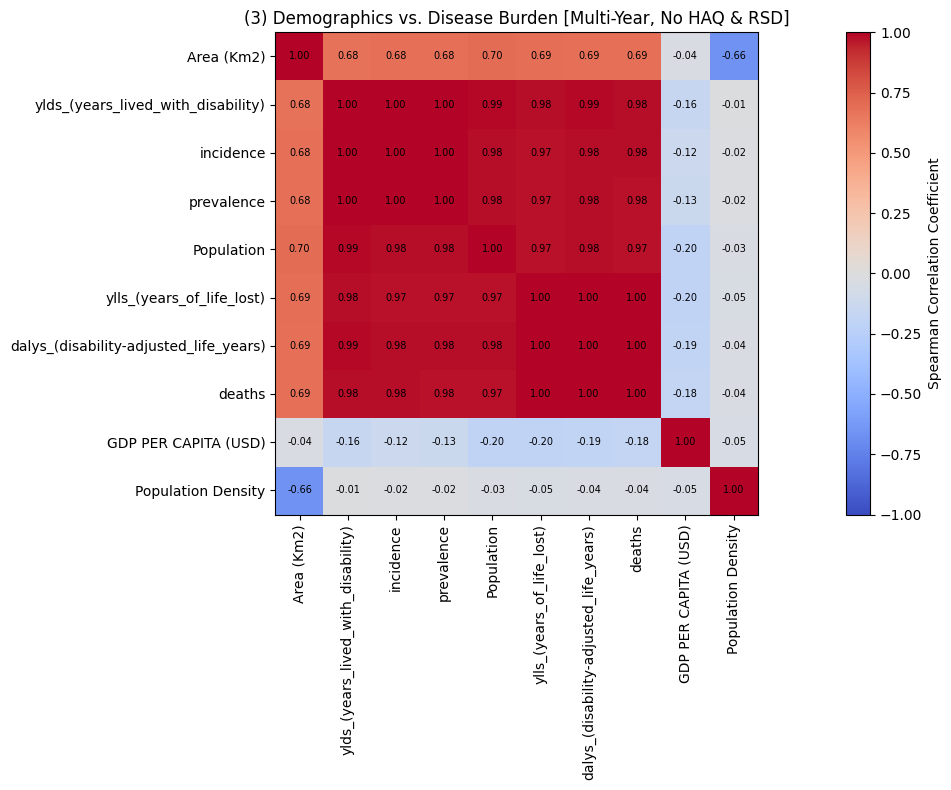

/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/299378978.py:69: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


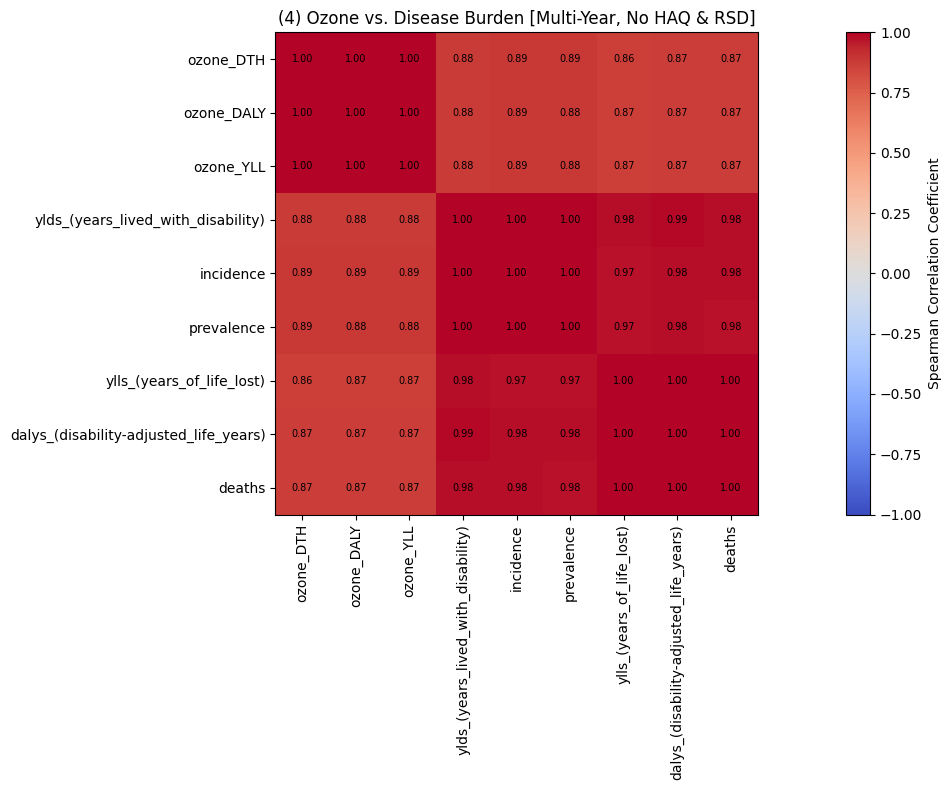

/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/299378978.py:69: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


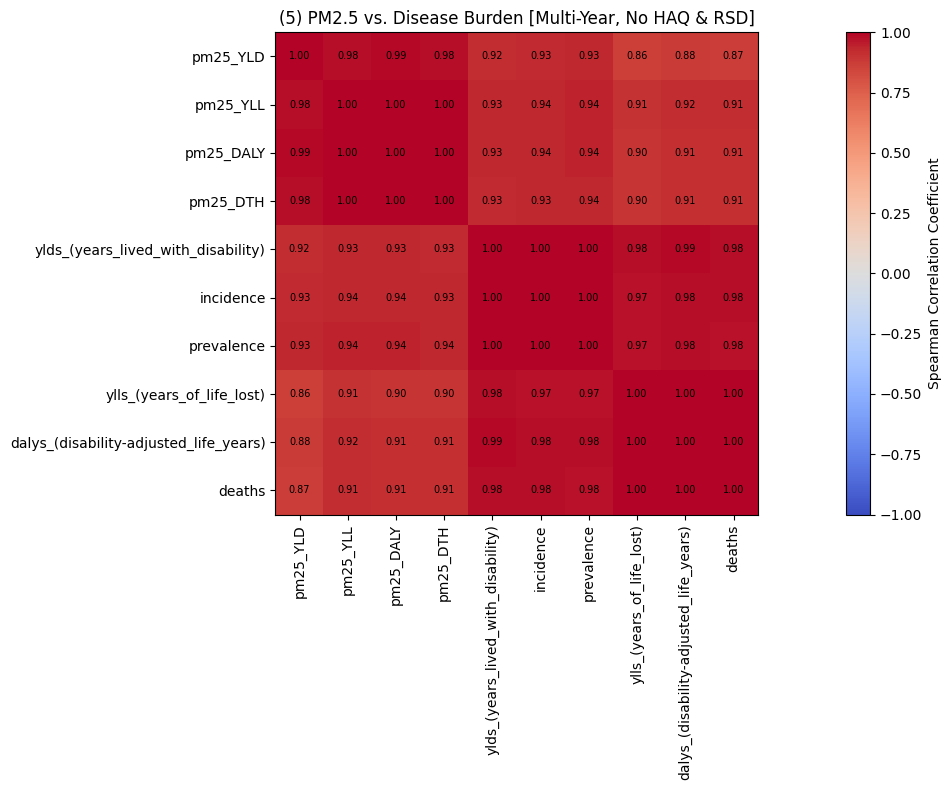

/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/299378978.py:69: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


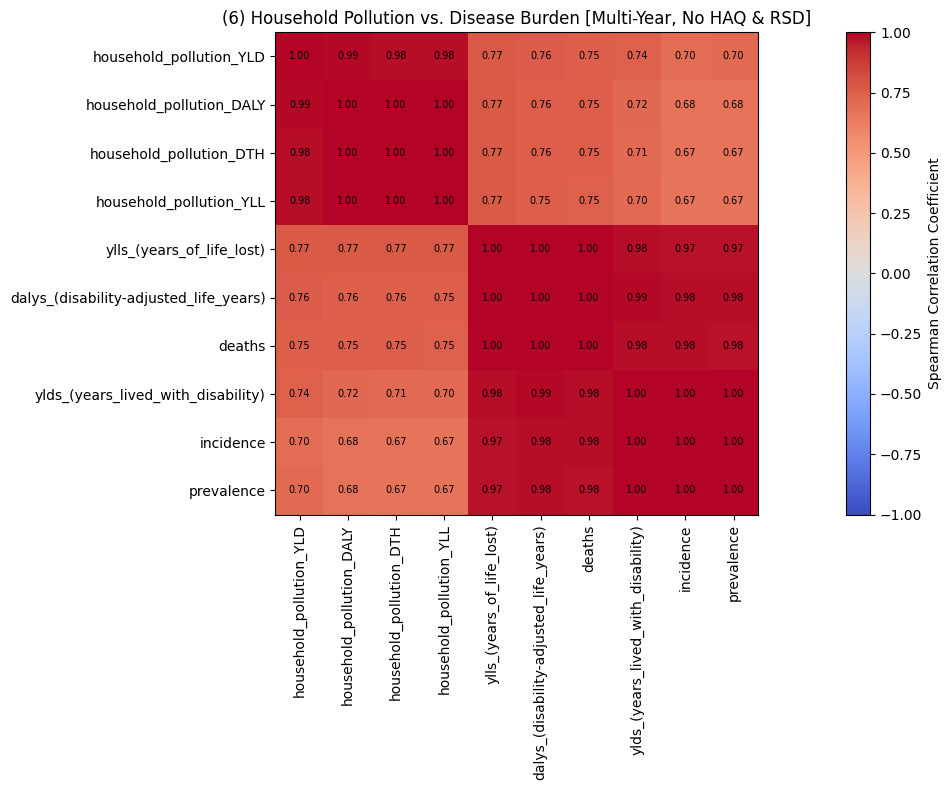

/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/299378978.py:69: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


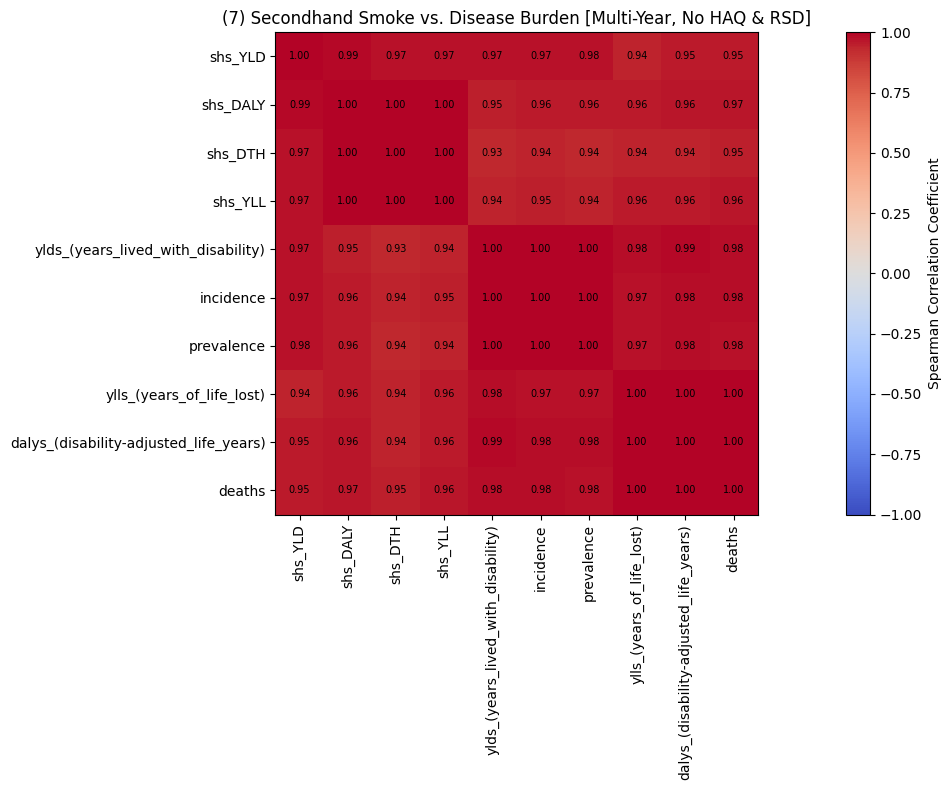

/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/299378978.py:69: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


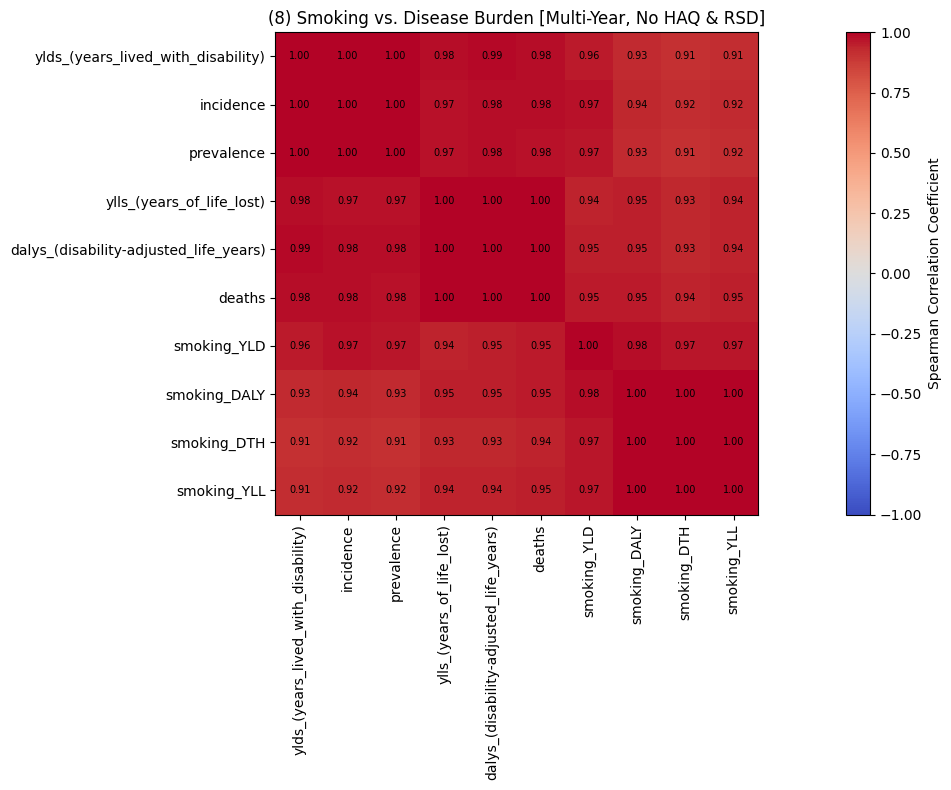

/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/299378978.py:69: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


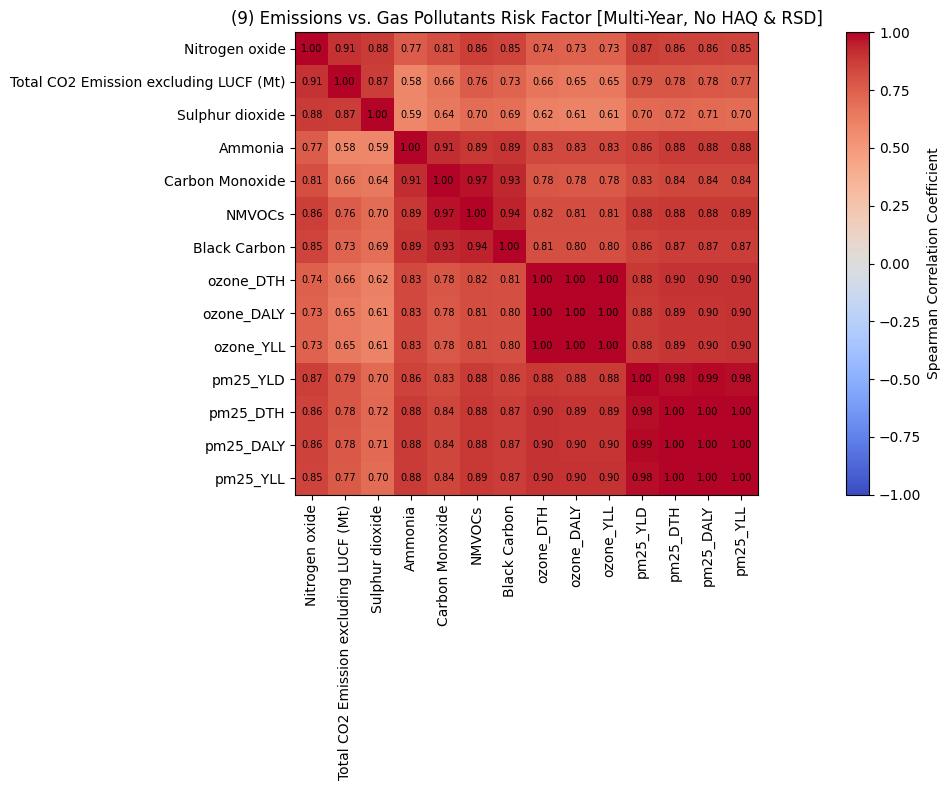

In [27]:

def correlation_plots_no_haq(merged_df):

    # Define subsets (excluding HAQ_Index)
    disease_burden_cols = [
        "dalys_(disability-adjusted_life_years)",
        "deaths",
        "incidence",
        "prevalence",
        "ylds_(years_lived_with_disability)",
        "ylls_(years_of_life_lost)"
    ]

    ozone_cols = ["ozone_DALY", "ozone_DTH", "ozone_YLD", "ozone_YLL"]
    pm25_cols = ["pm25_DALY", "pm25_DTH", "pm25_YLD", "pm25_YLL"]
    household_cols = [
        "household_pollution_DALY", "household_pollution_DTH",
        "household_pollution_YLD", "household_pollution_YLL"
    ]
    shs_cols = ["shs_DALY", "shs_DTH", "shs_YLD", "shs_YLL"]
    smoking_cols = ["smoking_DALY", "smoking_DTH", "smoking_YLD", "smoking_YLL"]
    risk_factor_cols = ozone_cols + pm25_cols + household_cols + shs_cols + smoking_cols

    #Gas Pollutants Risk Factors
    gp_risk_factor_cols = ozone_cols + pm25_cols

    emission_cols = [
        "Total CO2 Emission excluding LUCF (Mt)",
        "Nitrogen oxide",
        "Sulphur dioxide",
        "Carbon Monoxide",
        "NMVOCs",
        "Black Carbon",
        "Ammonia"
    ]

    demographic_cols = [
        "Population",
        "GDP PER CAPITA (USD)",
        "Area (Km2)",
        "Population Density"
    ]

    # 1) Risk Factors vs. Disease Burden
    cluster_and_plot_corr(
        merged_df[risk_factor_cols + disease_burden_cols],
        title="(1) Risk Factors vs. Disease Burden [Multi-Year, No HAQ & RSD]"
    )

    # 2) Emissions vs. Disease Burden
    cluster_and_plot_corr(
        merged_df[emission_cols + disease_burden_cols],
        title="(2) Emissions vs. Disease Burden [Multi-Year, No HAQ & RSD]"
    )

    # 3) Demographics vs. Disease Burden
    cluster_and_plot_corr(
        merged_df[demographic_cols + disease_burden_cols],
        title="(3) Demographics vs. Disease Burden [Multi-Year, No HAQ & RSD]"
    )

    # 4) Ozone vs. Disease Burden
    cluster_and_plot_corr(
        merged_df[ozone_cols + disease_burden_cols],
        title="(4) Ozone vs. Disease Burden [Multi-Year, No HAQ & RSD]"
    )

    # 5) PM2.5 vs. Disease Burden
    cluster_and_plot_corr(
        merged_df[pm25_cols + disease_burden_cols],
        title="(5) PM2.5 vs. Disease Burden [Multi-Year, No HAQ & RSD]"
    )

    # 6) Household Pollution vs. Disease Burden
    cluster_and_plot_corr(
        merged_df[household_cols + disease_burden_cols],
        title="(6) Household Pollution vs. Disease Burden [Multi-Year, No HAQ & RSD]"
    )

    # 7) Secondhand Smoke vs. Disease Burden
    cluster_and_plot_corr(
        merged_df[shs_cols + disease_burden_cols],
        title="(7) Secondhand Smoke vs. Disease Burden [Multi-Year, No HAQ & RSD]"
    )

    # 8) Smoking vs. Disease Burden
    cluster_and_plot_corr(
        merged_df[smoking_cols + disease_burden_cols],
        title="(8) Smoking vs. Disease Burden [Multi-Year, No HAQ & RSD]"
    )
    #9) Emmissions vs. Risk Factors
    cluster_and_plot_corr(
        merged_df[emission_cols + gp_risk_factor_cols],
        title="(9) Emissions vs. Gas Pollutants Risk Factor [Multi-Year, No HAQ & RSD]"
    )


# MULTI-YEAR WITHOUT HAQ
correlation_plots_no_haq(merged_df)

    
<h3> Correlation Plots with HAQ and RSD for selected years (2000, 2005, 2010, 2015, 2016, 2019) </h2>
</p>


> <p> The Correlation Plots below has RSD and HAQ since both data were recorded only for 2019. Also to improve clarity, the correlation plots were done by subsets, which are defined in the code below
> 2019 CORRELATIONS (HAQ & RSD): Produces 9 correlation plots

 Runs 9 correlation matrices on a DataFrame that is ALREADY filtered to 2019.

    Subsets:
      1) Risk Factors vs Disease Burden
      2) Emissions vs Disease Burden
      3) Demographics vs Disease Burden
      4) Ozone vs Disease Burden
      5) PM2.5 vs Disease Burden
      6) Household Pollution vs Disease Burden
      7) Secondhand Smoke vs Disease Burden
      8) Smoking vs Disease Burden
      9) Emmissions vs. Gas Pollutant Risk Factors



</p>   

In [28]:
def subset_to_haq_rsd_years(df):
    """
    Returns a new DataFrame containing only rows where Year == 2019.
    If 'Year' isn't in df, or if there are no 2019 rows, 
    returns an empty DataFrame.
    """
    # 1) Check if 'Year' column exists
    if "year" not in df.columns:
        print("[Error] 'Year' column not found. Returning empty DataFrame.")
        return pd.DataFrame()

   # Filter for selected years where HAQ and RSD is present
    df_haq_rsd_years = df[df["year"].isin([2000, 2005, 2010, 2015, 2016, 2019])].copy()

    
    # 3) (Optional) check if it's empty
    if df_haq_rsd_years.empty:
        print("[Warning] No rows found for selected years. Returning empty DataFrame.")
    
    return df_haq_rsd_years

df_haq_rsd_years = subset_to_haq_rsd_years(merged_df)


# df_haq_rsd_years.to_csv("df_haq_rsd_years.csv", index=False)

/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/929858948.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=constant_cols, inplace=True)
/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/929858948.py:27: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


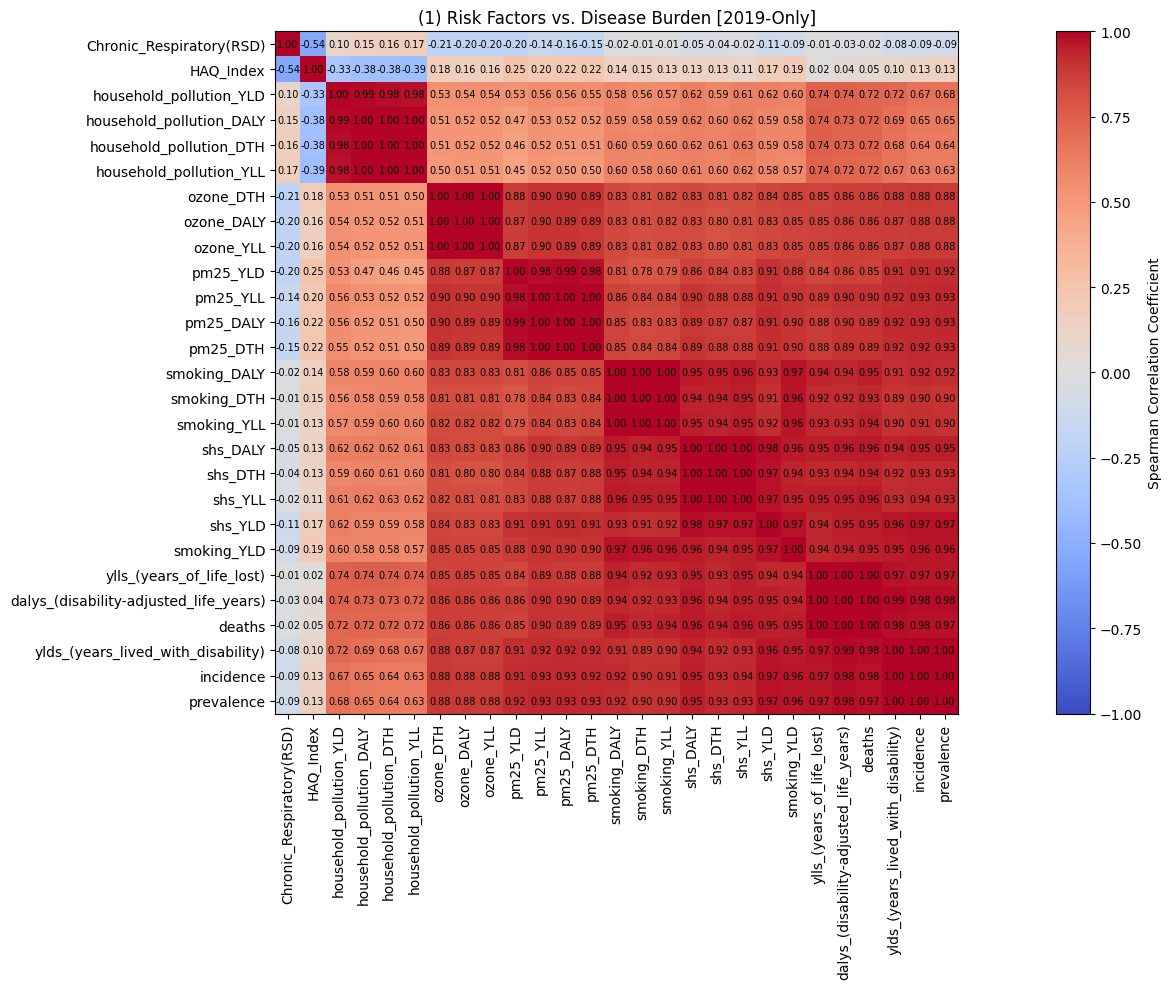

/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/929858948.py:27: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


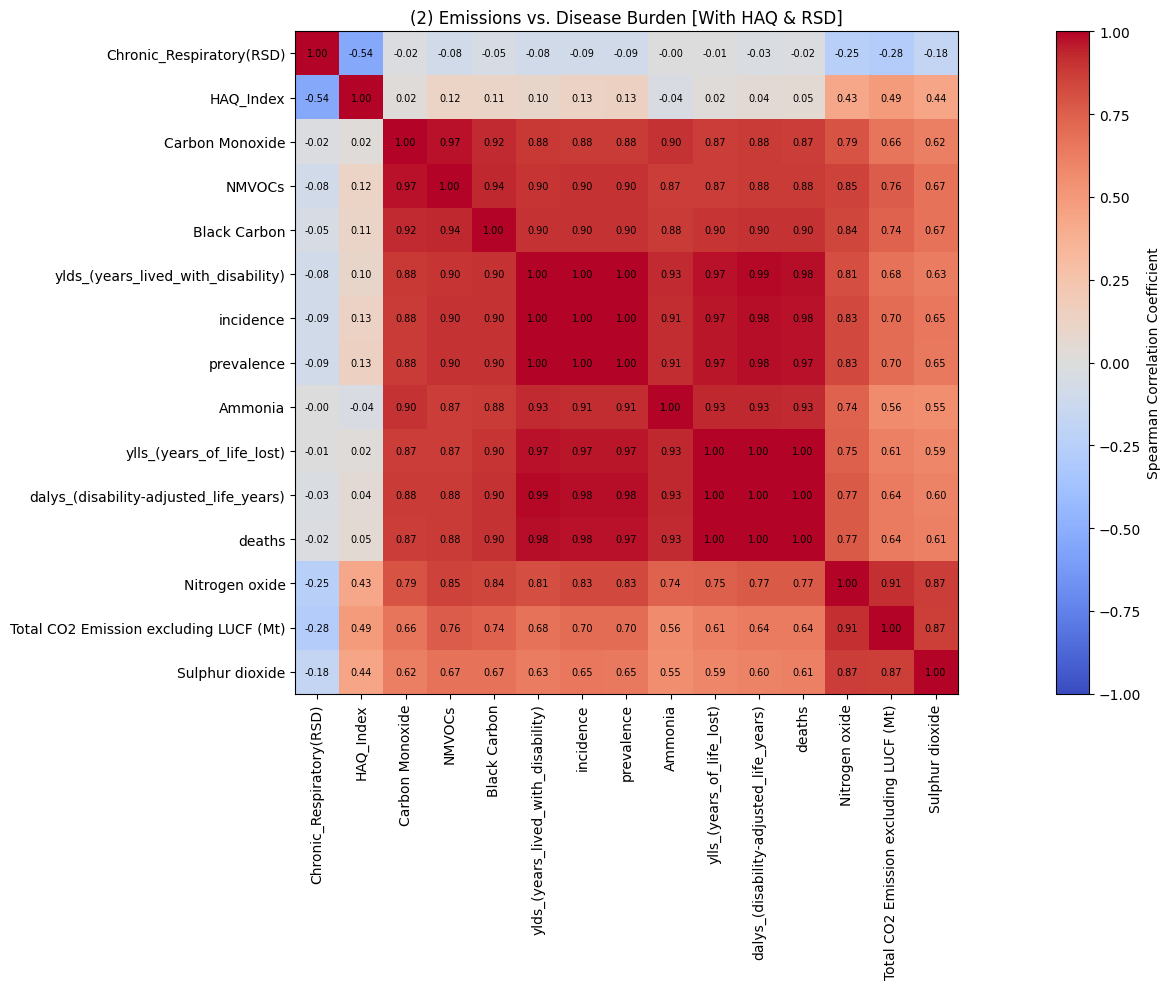

/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/929858948.py:27: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


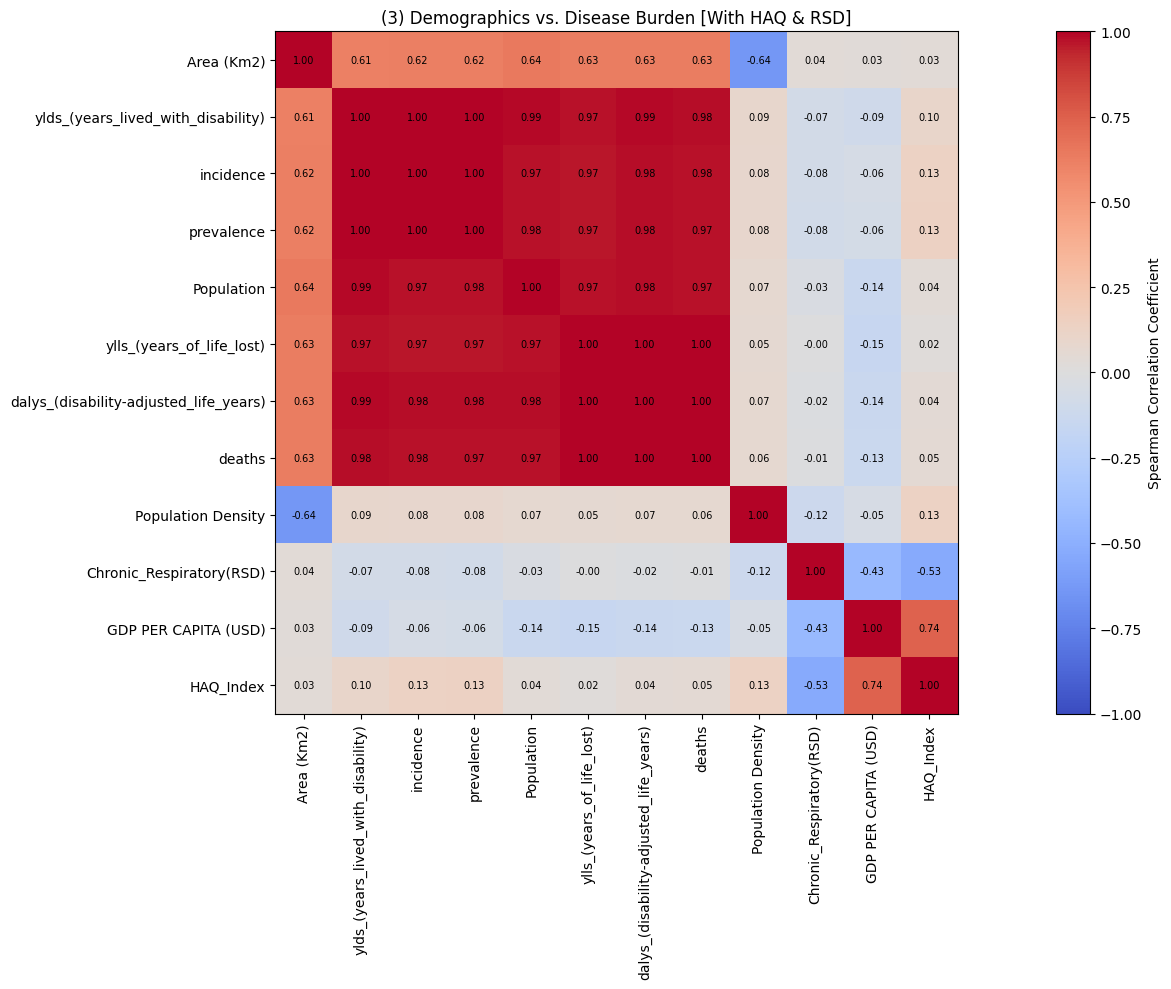

/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/929858948.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=constant_cols, inplace=True)
/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/929858948.py:27: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


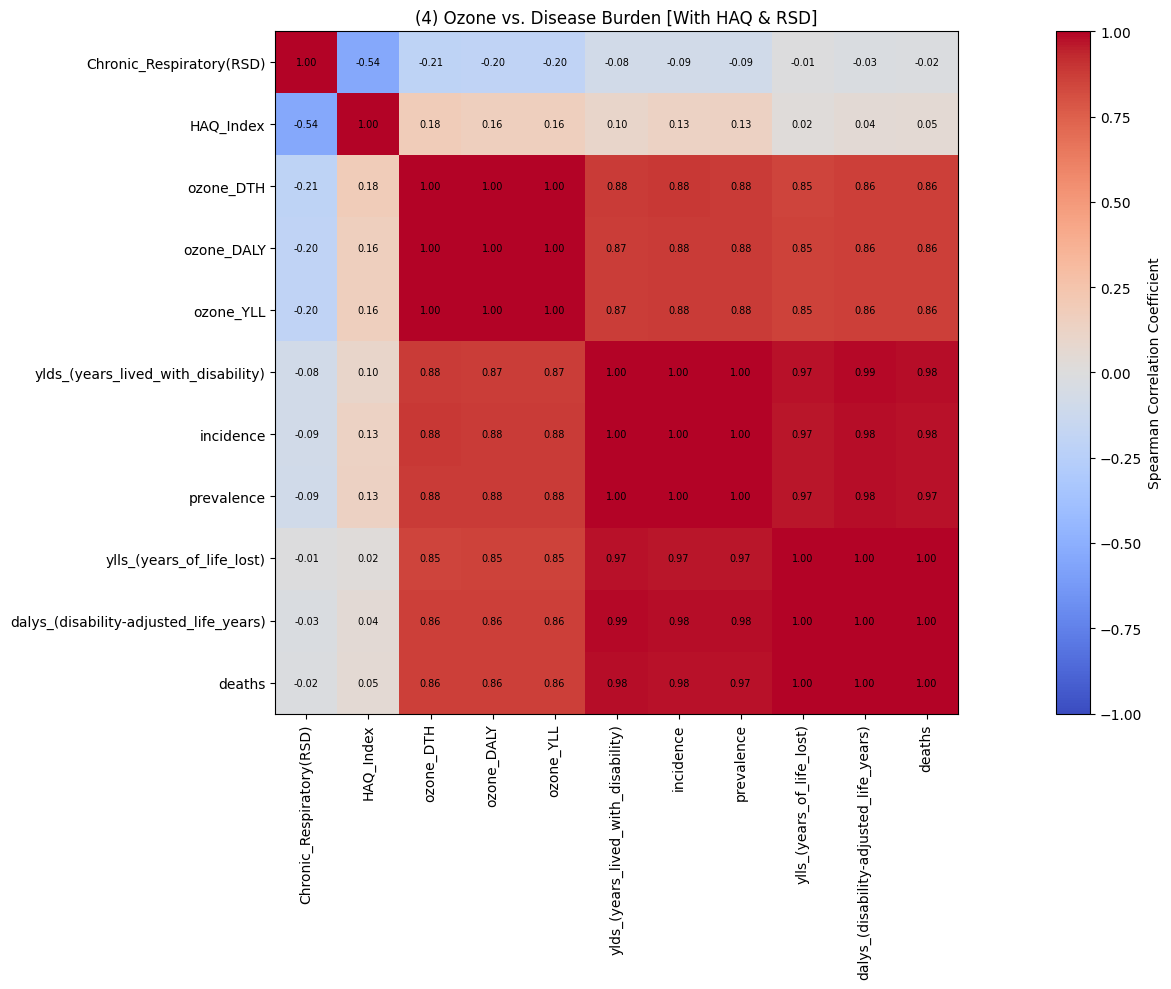

/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/929858948.py:27: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


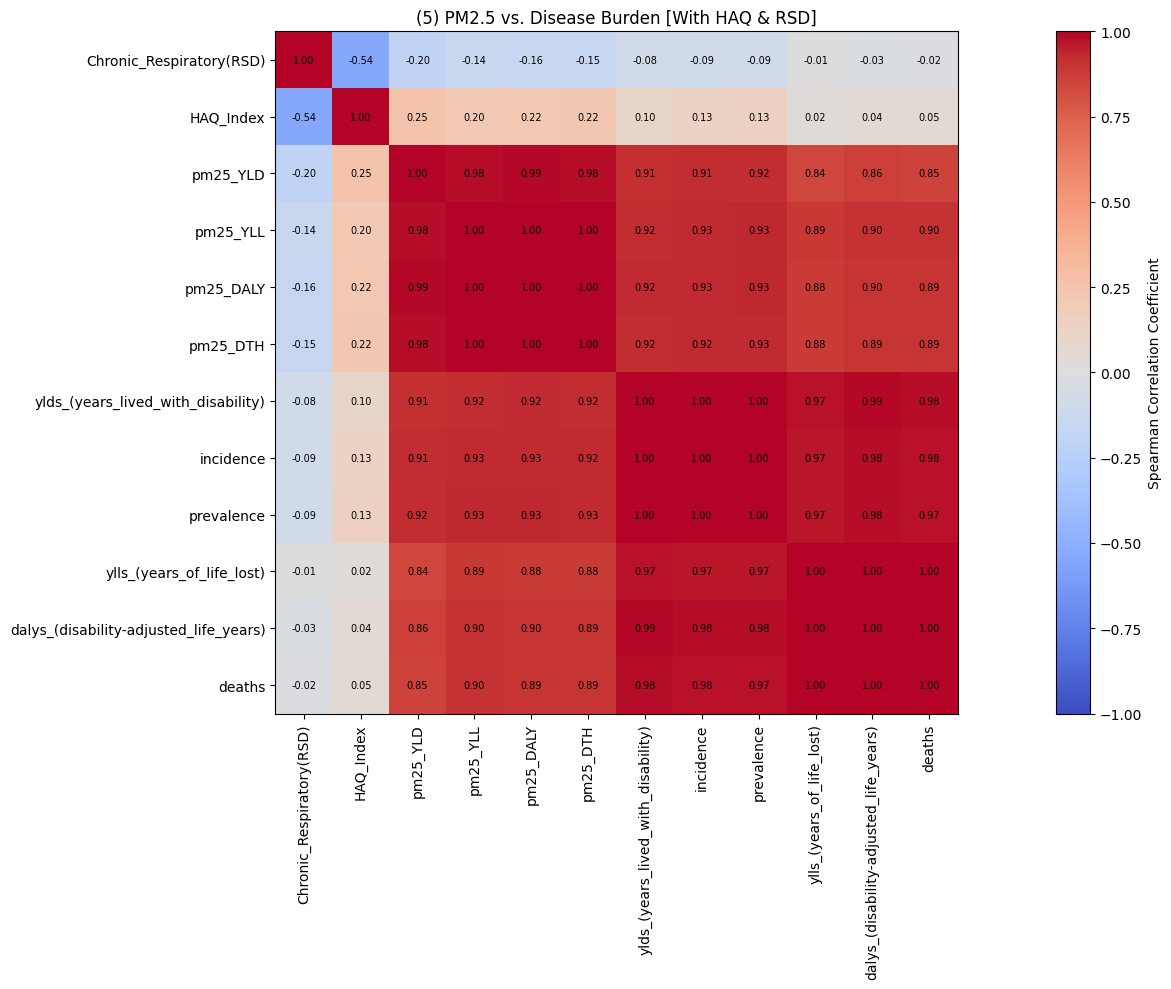

/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/929858948.py:27: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


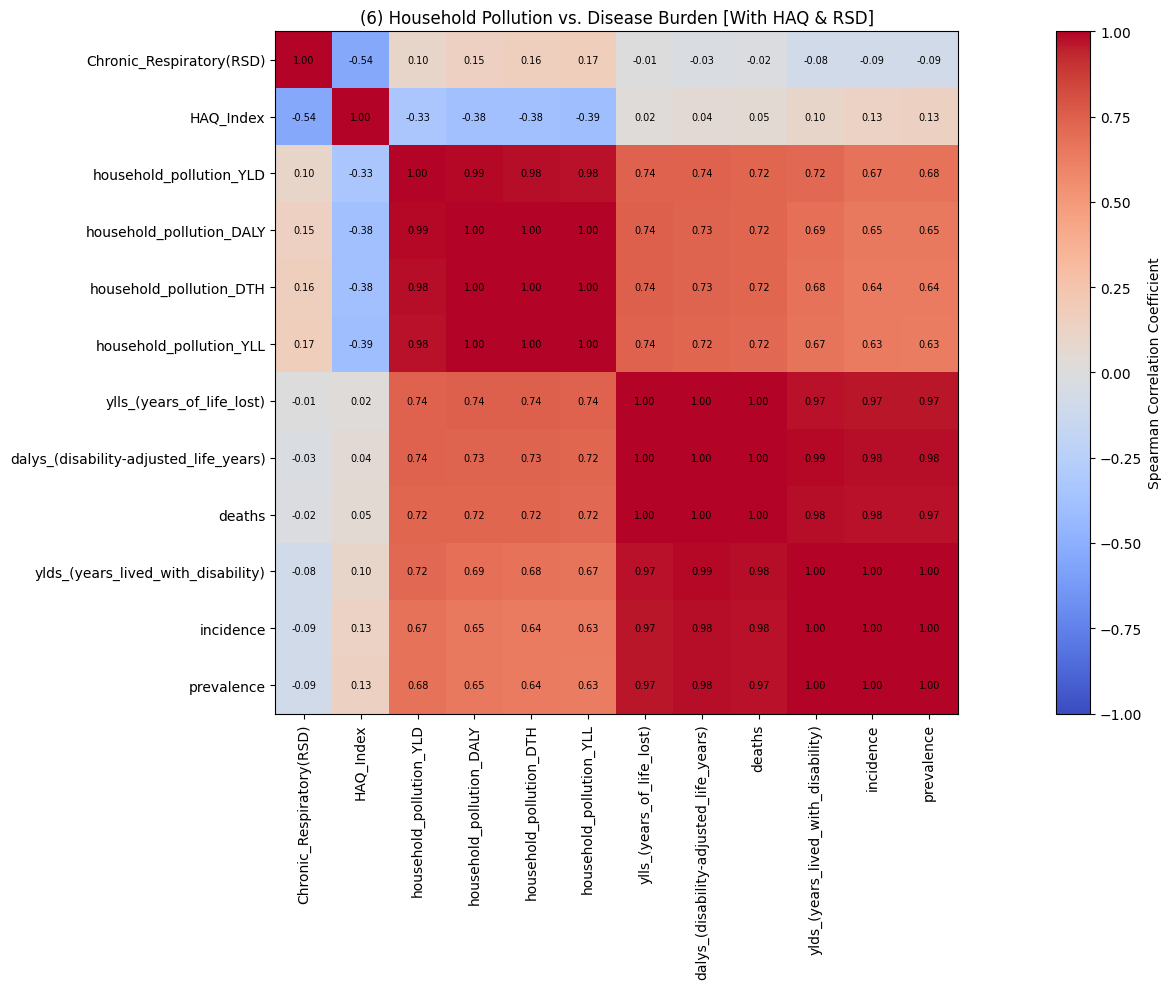

/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/929858948.py:27: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


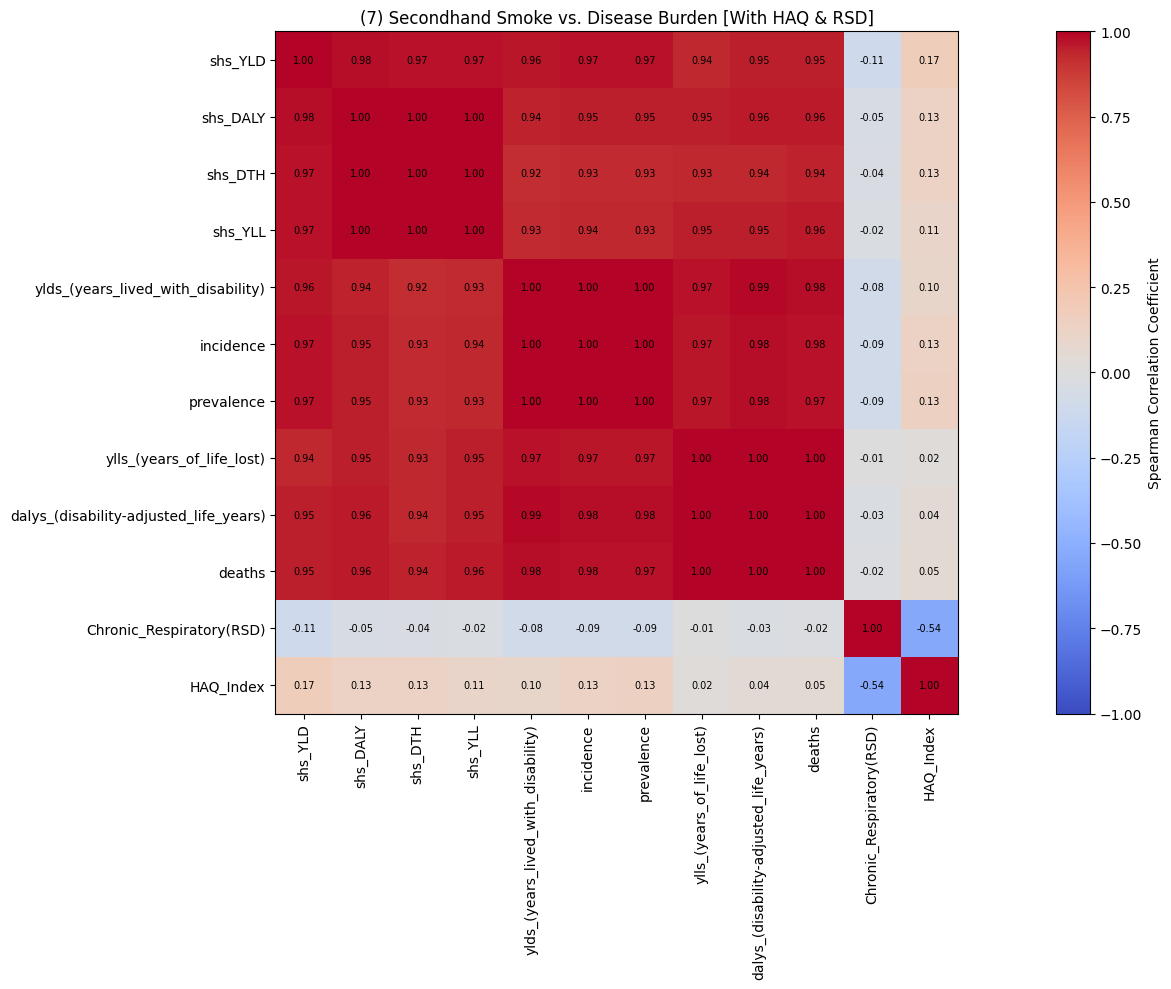

/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/929858948.py:27: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


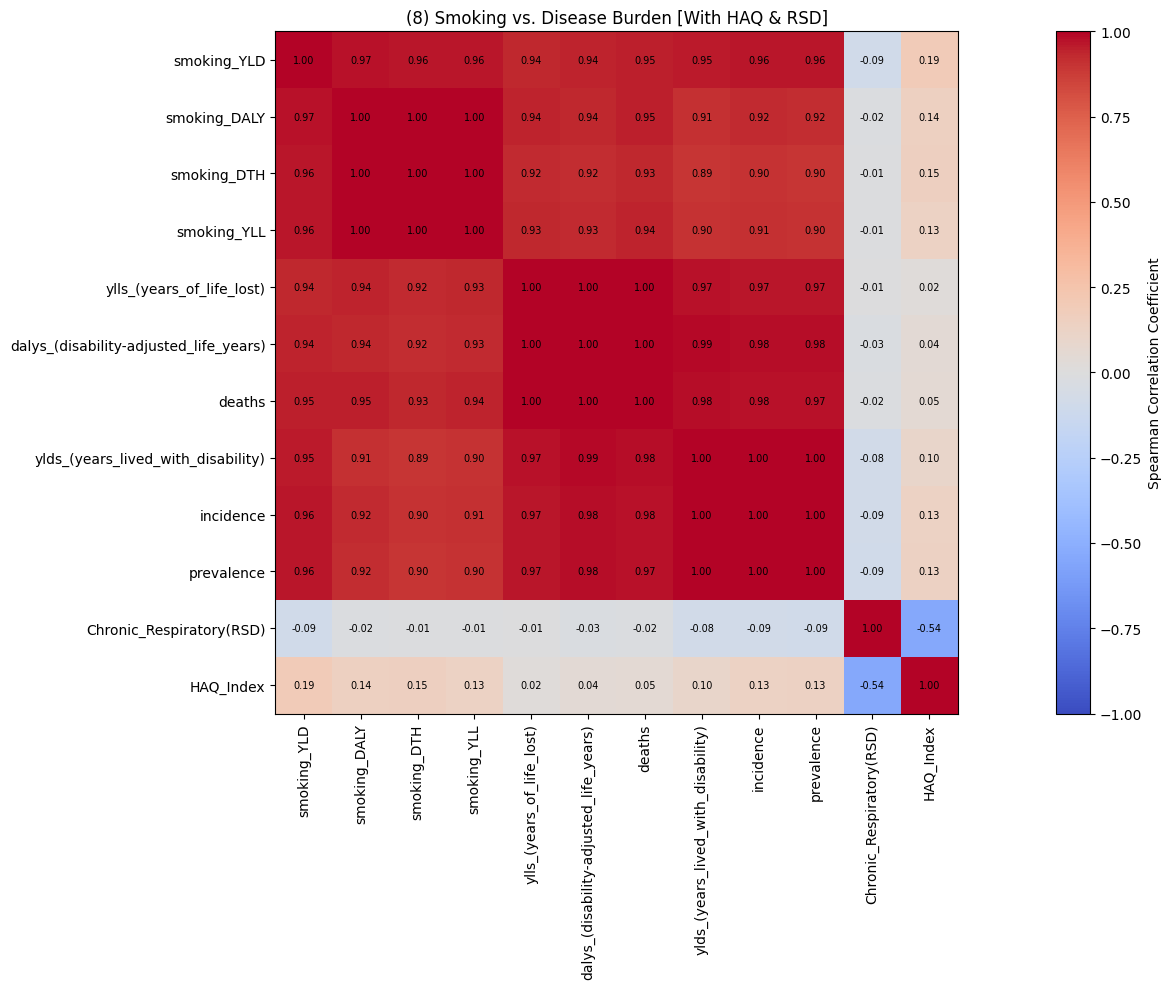

/var/folders/pr/tggh7p7s6pv8q1386lq2xmn40000gn/T/ipykernel_1379/929858948.py:27: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method="ward")


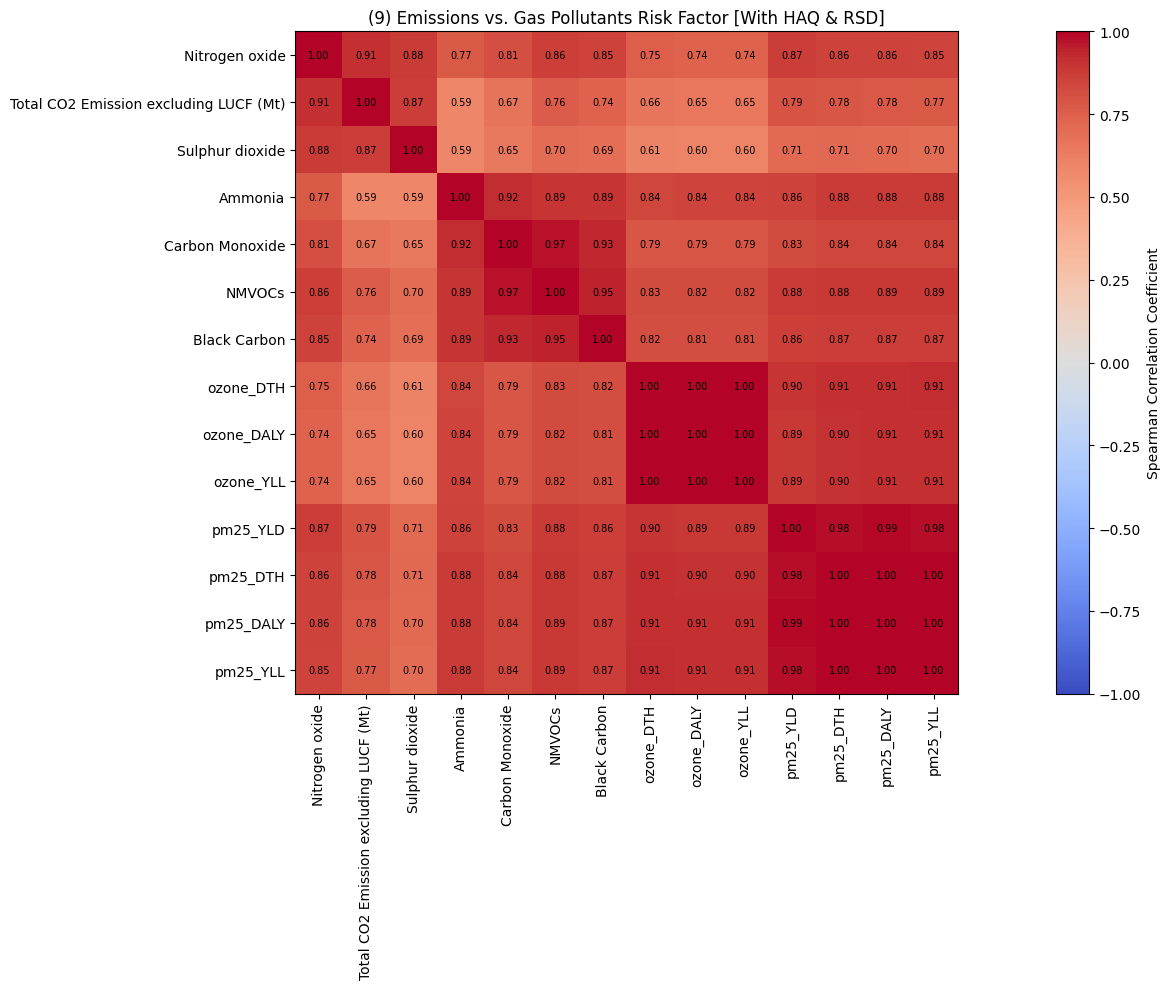

In [29]:
def cluster_and_plot_corr(df_sub, title="Correlation Heatmap", vmin=-1, vmax=1):
   
    # Drop rows with NaNs in the relevant columns
    df_clean = df_sub.dropna(axis=0)
    if df_clean.empty:
        warnings.warn(f"'{title}' skipped (no valid rows after dropping NaNs).")
        return

    # Drop any constant columns
    constant_cols = [c for c in df_clean.columns if df_clean[c].std() == 0]
    if constant_cols:
        df_clean.drop(columns=constant_cols, inplace=True)

    # If fewer than 2 columns remain, skip
    if df_clean.shape[1] < 2:
        warnings.warn(f"'{title}' skipped (fewer than 2 columns remain).")
        return

    # Spearman correlation
    corr = df_clean.corr(method="spearman")

    # Convert correlation to distance
    distance_matrix = 1 - np.abs(corr.values)
    distance_matrix[~np.isfinite(distance_matrix)] = 0  # replace any non-finite values

    try:
        Z = linkage(distance_matrix, method="ward")
    except ValueError as e:
        warnings.warn(f"Clustering failed for '{title}': {e}")
        return

    # Optimal ordering of leaves
    optimal_order = leaves_list(Z)

    # Reorder correlation matrix
    corr_reordered = corr.values[optimal_order][:, optimal_order]
    col_labels = corr.columns[optimal_order]

    # Plot
    plt.figure(figsize=(20, 10))
    plt.imshow(corr_reordered, vmin=vmin, vmax=vmax, cmap="coolwarm")
    cbar = plt.colorbar()
    cbar.set_label("Spearman Correlation Coefficient")

    plt.xticks(range(len(col_labels)), col_labels, rotation=90)
    plt.yticks(range(len(col_labels)), col_labels)

    # Annotate each cell with correlation
    for i in range(len(col_labels)):
        for j in range(len(col_labels)):
            val = corr_reordered[i, j]
            plt.text(j, i, f"{val:.2f}", ha="center", va="center", fontsize=7)

    plt.title(title)
    plt.tight_layout()
    plt.show()


# 2) Generate 9 Correlation Plots for 2019 Dataset

def correlation_plots_haq_rsd_years(df_haq_rsd_years):

    # Disease Burden columns
    disease_burden_cols = [
        "Chronic_Respiratory(RSD)",
        "dalys_(disability-adjusted_life_years)",
        "deaths",
        "incidence",
        "prevalence",
        "ylds_(years_lived_with_disability)",
        "ylls_(years_of_life_lost)",
        "HAQ_Index",  # Uncomment if you want to see HAQ in disease burden
    ]

    # Risk Factors
    ozone_cols = ["ozone_DALY", "ozone_DTH", "ozone_YLD", "ozone_YLL"]
    pm25_cols = ["pm25_DALY", "pm25_DTH", "pm25_YLD", "pm25_YLL"]
    household_cols = [
        "household_pollution_DALY", "household_pollution_DTH",
        "household_pollution_YLD", "household_pollution_YLL"
    ]
    shs_cols = ["shs_DALY", "shs_DTH", "shs_YLD", "shs_YLL"]
    smoking_cols = ["smoking_DALY", "smoking_DTH", "smoking_YLD", "smoking_YLL"]
    risk_factor_cols = ozone_cols + pm25_cols + household_cols + shs_cols + smoking_cols

    #Gas Pollutants Risk Factors
    gp_risk_factor_cols = ozone_cols + pm25_cols

    # Emissions
    emission_cols = [
        "Total CO2 Emission excluding LUCF (Mt)",
        "Nitrogen oxide",
        "Sulphur dioxide",
        "Carbon Monoxide",
        "NMVOCs",
        "Black Carbon",
        "Ammonia"
    ]

    # Demographics
    demographic_cols = [
        "Population",
        "GDP PER CAPITA (USD)",
        "Area (Km2)",
        "Population Density"
    ]

    # 1) Risk Factors vs. Disease Burden
    cluster_and_plot_corr(
        df_haq_rsd_years[risk_factor_cols + disease_burden_cols],
        title="(1) Risk Factors vs. Disease Burden [2019-Only]"
    )

    # 2) Emissions vs. Disease Burden
    cluster_and_plot_corr(
        df_haq_rsd_years[emission_cols + disease_burden_cols],
        title="(2) Emissions vs. Disease Burden [With HAQ & RSD]"
    )

    # 3) Demographics vs. Disease Burden
    cluster_and_plot_corr(
        df_haq_rsd_years[demographic_cols + disease_burden_cols],
        title="(3) Demographics vs. Disease Burden [With HAQ & RSD]"
    )

    # 4) Ozone vs. Disease Burden
    cluster_and_plot_corr(
        df_haq_rsd_years[ozone_cols + disease_burden_cols],
        title="(4) Ozone vs. Disease Burden [With HAQ & RSD]"
    )

    # 5) PM2.5 vs. Disease Burden
    cluster_and_plot_corr(
        df_haq_rsd_years[pm25_cols + disease_burden_cols],
        title="(5) PM2.5 vs. Disease Burden [With HAQ & RSD]"
    )

    # 6) Household Pollution vs. Disease Burden
    cluster_and_plot_corr(
        df_haq_rsd_years[household_cols + disease_burden_cols],
        title="(6) Household Pollution vs. Disease Burden [With HAQ & RSD]"
    )

    # 7) Secondhand Smoke vs. Disease Burden
    cluster_and_plot_corr(
        df_haq_rsd_years[shs_cols + disease_burden_cols],
        title="(7) Secondhand Smoke vs. Disease Burden [With HAQ & RSD]"
    )

    # 8) Smoking vs. Disease Burden
    cluster_and_plot_corr(
        df_haq_rsd_years[smoking_cols + disease_burden_cols],
        title="(8) Smoking vs. Disease Burden [With HAQ & RSD]"
    )

    #9) Emmissions vs. Gas Pollutant Risk Factors
    cluster_and_plot_corr(
        df_haq_rsd_years[emission_cols + gp_risk_factor_cols],
        title="(9) Emissions vs. Gas Pollutants Risk Factor [With HAQ & RSD]"
    )


correlation_plots_haq_rsd_years(df_haq_rsd_years)

### Data Visualization

In [30]:
# 2. COPD Burden by Sub-Region

regional_burden = (
    merged_df
    .groupby('Sub-Region')[
        ['deaths', 'ylls_(years_of_life_lost)', 'ylds_(years_lived_with_disability)', 'incidence', 'prevalence']
    ]
    .mean(numeric_only=True)
    .sort_values(by='deaths', ascending=False)
)

In [31]:
 # 3. Top Countries by COPD Burden

top_countries_copd = (
    merged_df
    .groupby('country')[
        ['deaths', 'ylls_(years_of_life_lost)', 'smoking_DTH', 'incidence', 'prevalence']
        # ^ e.g. pm25_DTH means "PM2.5 Deaths." If you prefer pm25_DALY or pm25_YLD, swap accordingly.
    ]
    .mean(numeric_only=True)
    .sort_values(by='deaths', ascending=False)
    .head(10)
)

top_countries_copd

deaths  ylls_(years_of_life_lost)  \
country                                                                 
south africa                  12329.095238              257823.476190   
nigeria                       11098.142857              232691.333333   
democratic republic of congo   9391.619048              215875.619048   
egypt                          9192.809524              214435.857143   
ethiopia                       7362.190476              163477.380952   
morocco                        4762.809524               96863.238095   
kenya                          4394.285714               97357.952381   
algeria                        3685.761905               71111.190476   
sudan                          3608.904762               81552.952381   
tanzania                       3584.285714               78092.238095   

                              smoking_DTH     incidence    prevalence  
country                                                                
south africa                  3759.904762  60188.285714  8.137540e+05  
nigeria                        795.095238  89306.428571  1.347572e+06  
democratic republic of congo   950.952381  43252.952381  5.665158e+05  
egypt                         3655.333333  77851.714286  1.088363e+06  
ethiopia                       664.571429  44006.380952  6.446697e+05  
morocco                       1066.761905  38481.047619  5.510830e+05  
kenya                          859.095238  19467.190476  2.797822e+05  
algeria                       1364.666667  44635.952381  6.314777e+05  
sudan                         1090.380952  27188.904762  3.829710e+05  
tanzania                       842.047619  20606.333333  3.128168e+05

In [32]:
# 4. Regional Time-Series Analysis
##############################################################################
# Adjust these columns to match your dataset’s actual names
region_features = [
    'Sub-Region', 
    'year', 
    'GDP PER CAPITA (USD)',          # was "GDP PER CAPITA (USD)" in your snippet
    'Population Density', 
    'Total CO2 Emission excluding LUCF (Mt)',  # was "Total CO2 Emission excluding LUCF (Mt)"
    'pm25_DTH',                # or pm25_DALY, pm25_YLD, etc.
    'smoking_DTH',            # or smoking_DALY, etc.
    'household_pollution_DTH',# or household_pollution_DALY, etc.
    'deaths',
    'ylls_(years_of_life_lost)',
    'ylds_(years_lived_with_disability)',
    'dalys_(disability-adjusted_life_years)',
    'incidence',
    'prevalence',
    'Chronic_Respiratory(RSD)',
    'HAQ_Index'

]

regional_df = merged_df[region_features].copy()
regional_trends = (
    regional_df
    .groupby(['Sub-Region', 'year'])
    .mean(numeric_only=True)
    .reset_index()
)

regional_trends

Sub-Region  year  GDP PER CAPITA (USD)  Population Density  \
0    Eastern Africa  2000           1064.325625          116.541125   
1    Eastern Africa  2001           1068.562500          118.488983   
2    Eastern Africa  2002           1135.490000          120.874845   
3    Eastern Africa  2003           1219.825000          123.018826   
4    Eastern Africa  2004           1397.715000          125.371638   
..              ...   ...                   ...                 ...   
100  Western Africa  2016           1201.150625           88.782319   
101  Western Africa  2017           1245.266875           90.983251   
102  Western Africa  2018           1349.749375           93.192592   
103  Western Africa  2019           1367.259375           95.418294   
104  Western Africa  2020           1318.626875           97.677491   

     Total CO2 Emission excluding LUCF (Mt)    pm25_DTH  smoking_DTH  \
0                                  2.304444  101.222222   326.388889   
1                                  2.334444  100.833333   322.722222   
2                                  2.303333  100.555556   321.944444   
3                                  2.234444   99.944444   321.333333   
4                                  2.371667  100.277778   322.944444   
..                                      ...         ...          ...   
100                               10.815625  385.875000   181.312500   
101                               10.853125  369.125000   183.625000   
102                               11.417500  351.500000   185.375000   
103                               12.155000  344.500000   188.000000   
104                               11.708750  368.000000   188.937500   

     household_pollution_DTH       deaths  ylls_(years_of_life_lost)  \
0                1034.166667  1605.944444               36952.000000   
1                1029.166667  1598.666667               36734.500000   
2                1036.000000  1608.500000               36908.666667   
3                1044.166667  1619.555556               37184.111111   
4                1058.388889  1640.611111               37662.111111   
..                       ...          ...                        ...   
100               774.687500  1710.125000               38011.312500   
101               799.437500  1738.000000               38621.750000   
102               822.500000  1763.562500               39111.000000   
103               841.500000  1791.875000               39690.125000   
104               832.625000  1814.312500               40308.812500   

     ylds_(years_lived_with_disability)  \
0                           9624.777778   
1                           9834.166667   
2                          10053.777778   
3                          10280.666667   
4                          10519.833333   
..                                  ...   
100                        17945.125000   
101                        18599.750000   
102                        19290.500000   
103                        20027.375000   
104                        20760.937500   

     dalys_(disability-adjusted_life_years)     incidence     prevalence  \
0                              46577.111111   7124.611111  101961.222222   
1                              46569.166667   7266.666667  104174.500000   
2                              46963.000000   7409.722222  106424.722222   
3                              47465.388889   7557.777778  108754.777778   
4                              48182.444444   7715.111111  111209.722222   
..                                      ...           ...            ...   
100                            55956.875000  12547.562500  190128.562500   
101                            57222.250000  13043.625000  197173.562500   
102                            58402.000000  13574.375000  204691.000000   
103                            59718.187500  14114.375000  212538.625000   
104                            61070.312500  14666.687500  220624.562500 

In [33]:
# 5. Time-Lag Analysis (5-Year Lag for Death)
##############################################################################
merged_df_sorted = merged_df.sort_values(by=['Sub-Region', 'year'])

# If you want to test PM2.5 mortality or DALYs, pick the column accordingly, e.g. pm25_DTH
merged_df_sorted['deaths_Lag5'] = (
    merged_df_sorted
    .groupby('Sub-Region')['deaths']  # or pm25_DALY
    .shift(5)
)

# We correlate the 5-year-lagged deaths with total DALYs
lag_corr = merged_df_sorted[['deaths', 'dalys_(disability-adjusted_life_years)']].corr().iloc[0, 1]

lag_corr

np.float64(0.9965046148279476)

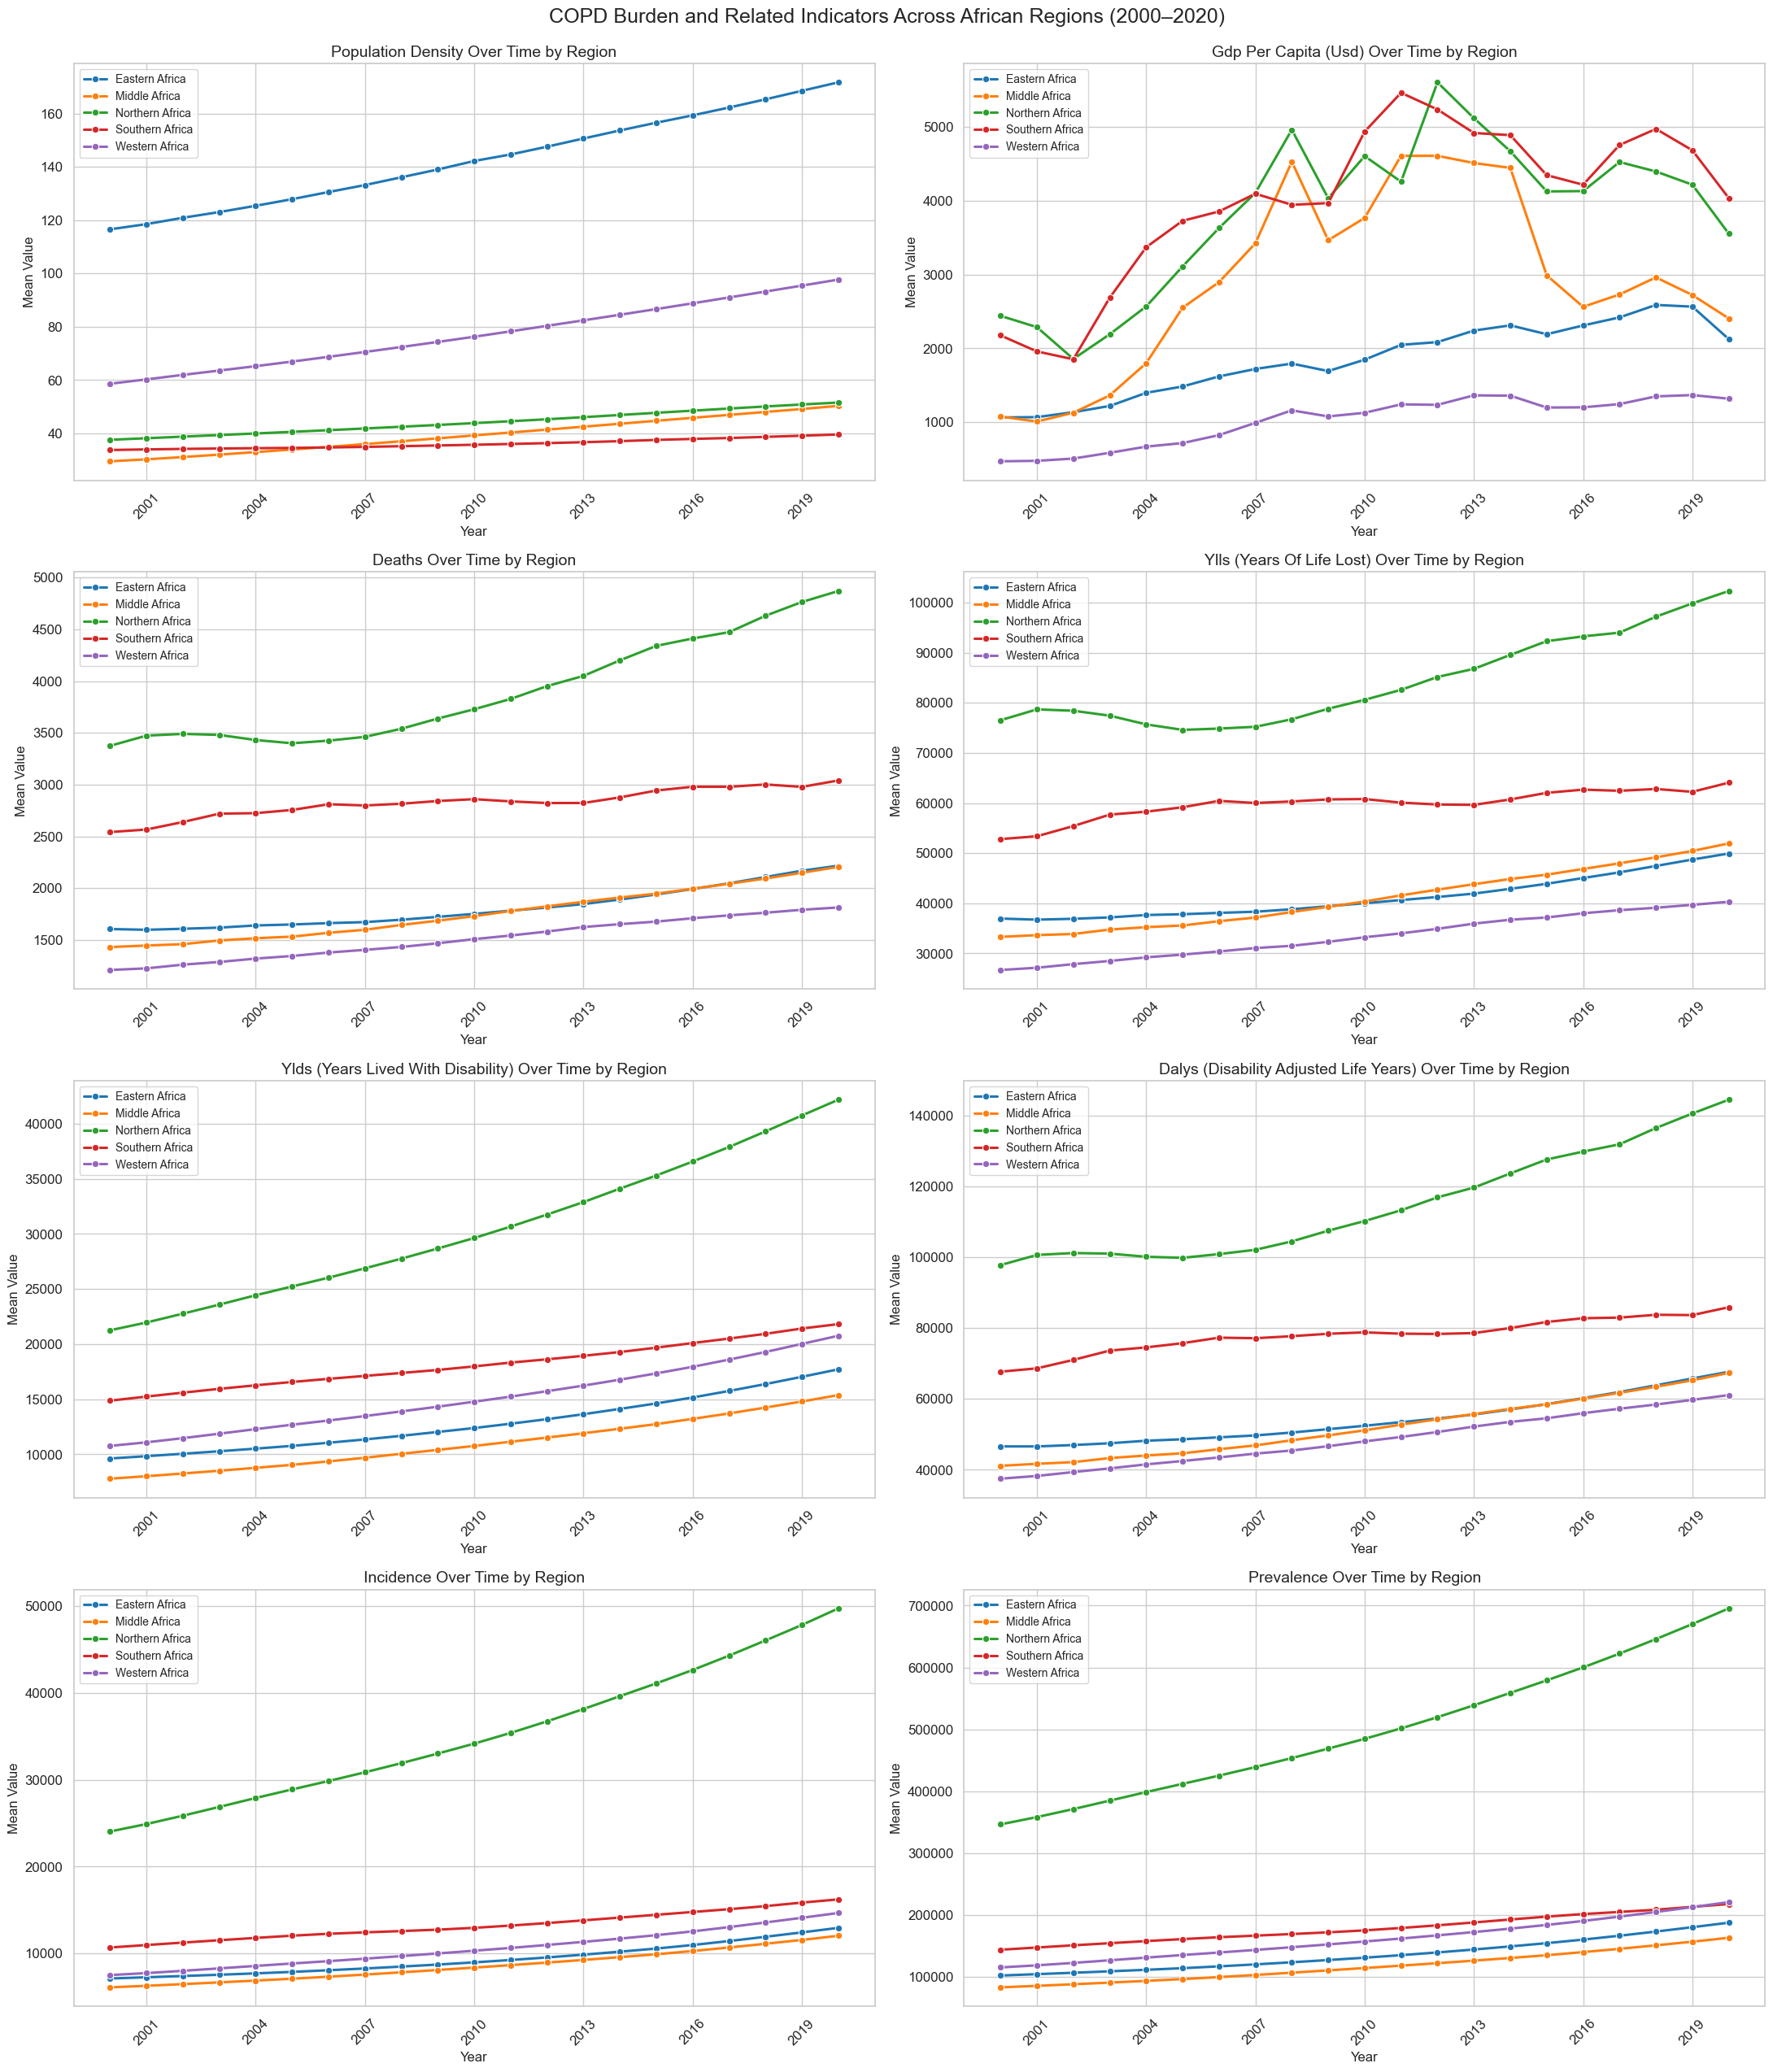

In [43]:

from matplotlib.ticker import MaxNLocator

# Set global Seaborn style
sns.set(style="whitegrid", palette="tab10", font_scale=1.1)

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(22, 26))
axes = axes.flatten()

# Features to plot
plot_features = [
    'Population Density',
    'GDP PER CAPITA (USD)',
    'deaths',
    'ylls_(years_of_life_lost)',
    'ylds_(years_lived_with_disability)',
    'dalys_(disability-adjusted_life_years)',
    'incidence',
    'prevalence'
]

# Unique region values
regions = regional_trends['Sub-Region'].dropna().unique()

# Line plot per subplot
for i, feature in enumerate(plot_features):
    ax = axes[i]
    for region in regions:
        data = regional_trends[regional_trends['Sub-Region'] == region]
        sns.lineplot(
            data=data,
            x='year',
            y=feature,
            label=region,
            ax=ax,
            linewidth=2.2,
            marker="o"
        )
    # Format title and labels
    clean_title = feature.replace("_", " ").replace("-", " ").title()
    ax.set_title(f"{clean_title} Over Time by Region", fontsize=14)
    ax.set_ylabel("Mean Value", fontsize=12)
    ax.set_xlabel("Year", fontsize=12)

    # Force integer year ticks
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis='x', rotation=45)

    # Optional grid and legend
    ax.grid(True)
    ax.legend(loc='upper left', fontsize=10)

# Layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.97])
fig.suptitle("COPD Burden and Related Indicators Across African Regions (2000–2020)", fontsize=18)
plt.show()


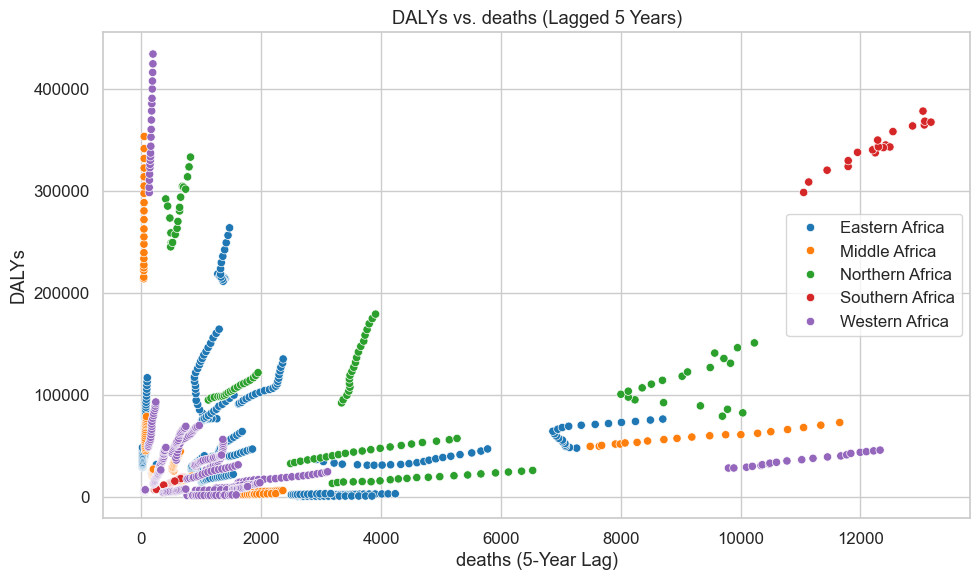

In [36]:
# 7. Lag Effect Scatterplot
##############################################################################
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_sorted, x='deaths_Lag5', y='dalys_(disability-adjusted_life_years)', hue='Sub-Region')
plt.title("DALYs vs. deaths (Lagged 5 Years)")
plt.xlabel("deaths (5-Year Lag)")
plt.ylabel("DALYs")
plt.legend()
plt.tight_layout()
plt.show()

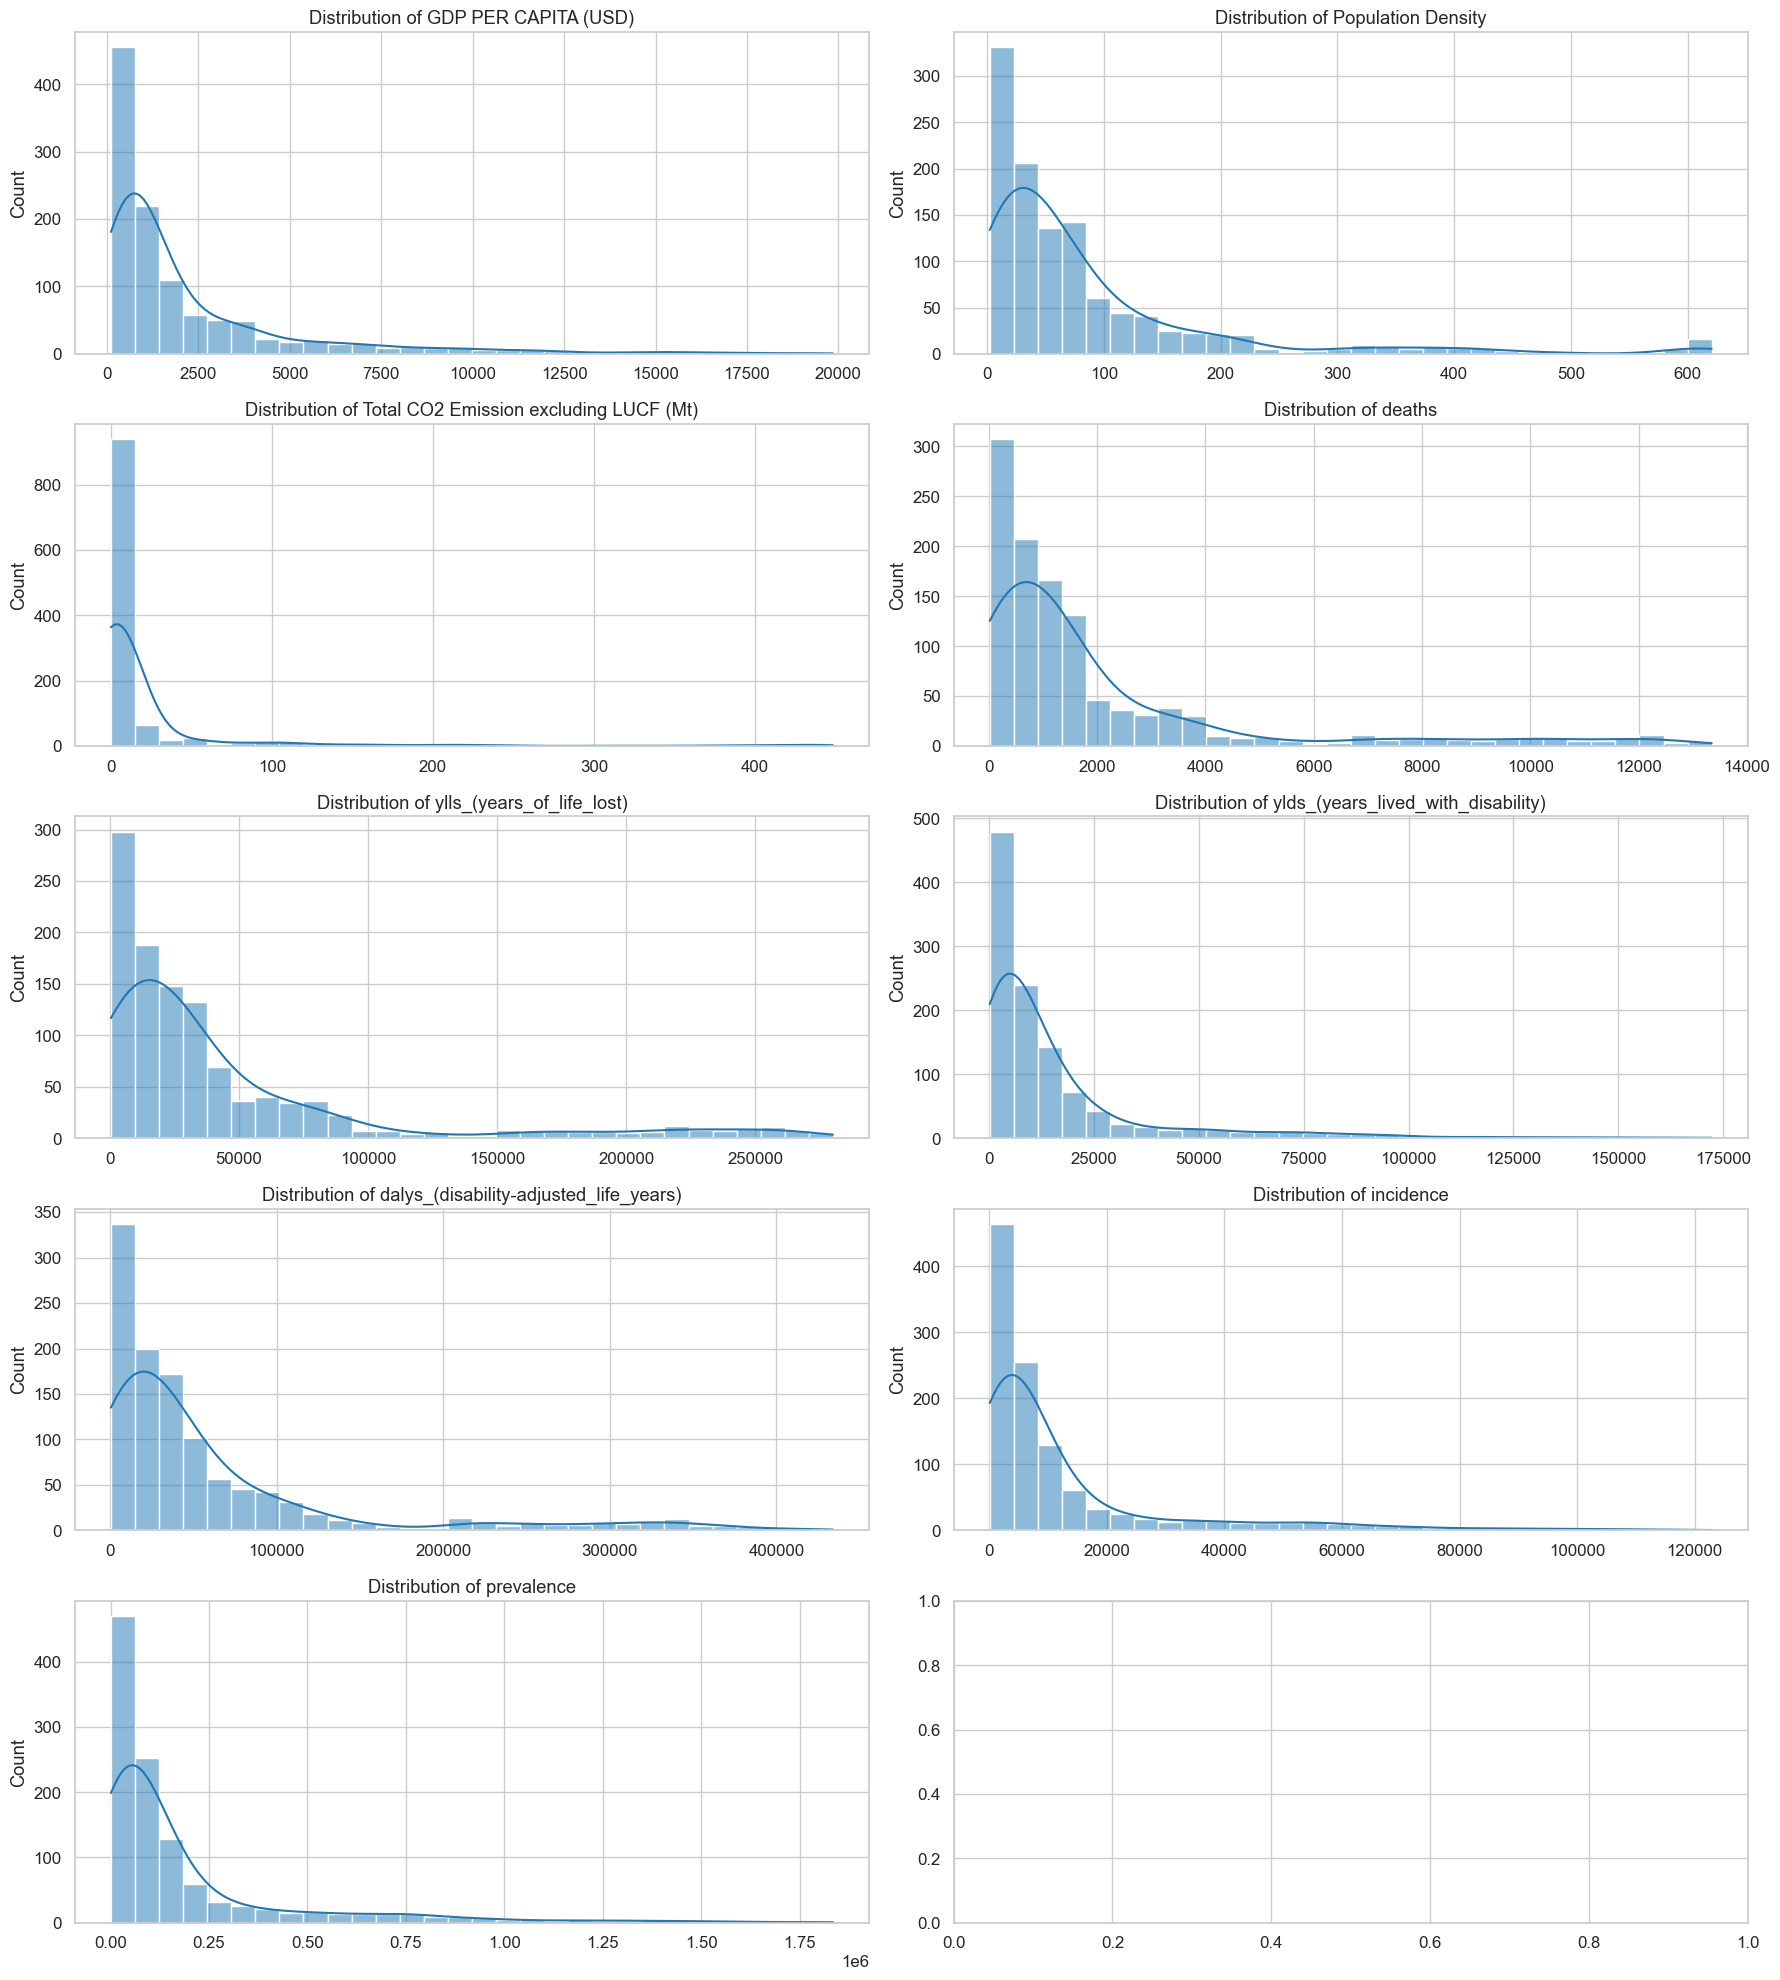

In [37]:
# 9. Histograms/KDE plots for variable shapes
##############################################################################
features_to_plot = [
    'GDP PER CAPITA (USD)',
    'Population Density',
    'Total CO2 Emission excluding LUCF (Mt)',
    'deaths',
    'ylls_(years_of_life_lost)',
    'ylds_(years_lived_with_disability)',
    'dalys_(disability-adjusted_life_years)',
    'incidence',
    'prevalence'
]

# Set up subplots
n_features = len(features_to_plot)
ncols = 2
nrows = (n_features + 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 20))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    ax = axes[i]
    sns.histplot(merged_df[feature].dropna(), kde=True, ax=ax, bins=30)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('')
plt.tight_layout()
plt.show()

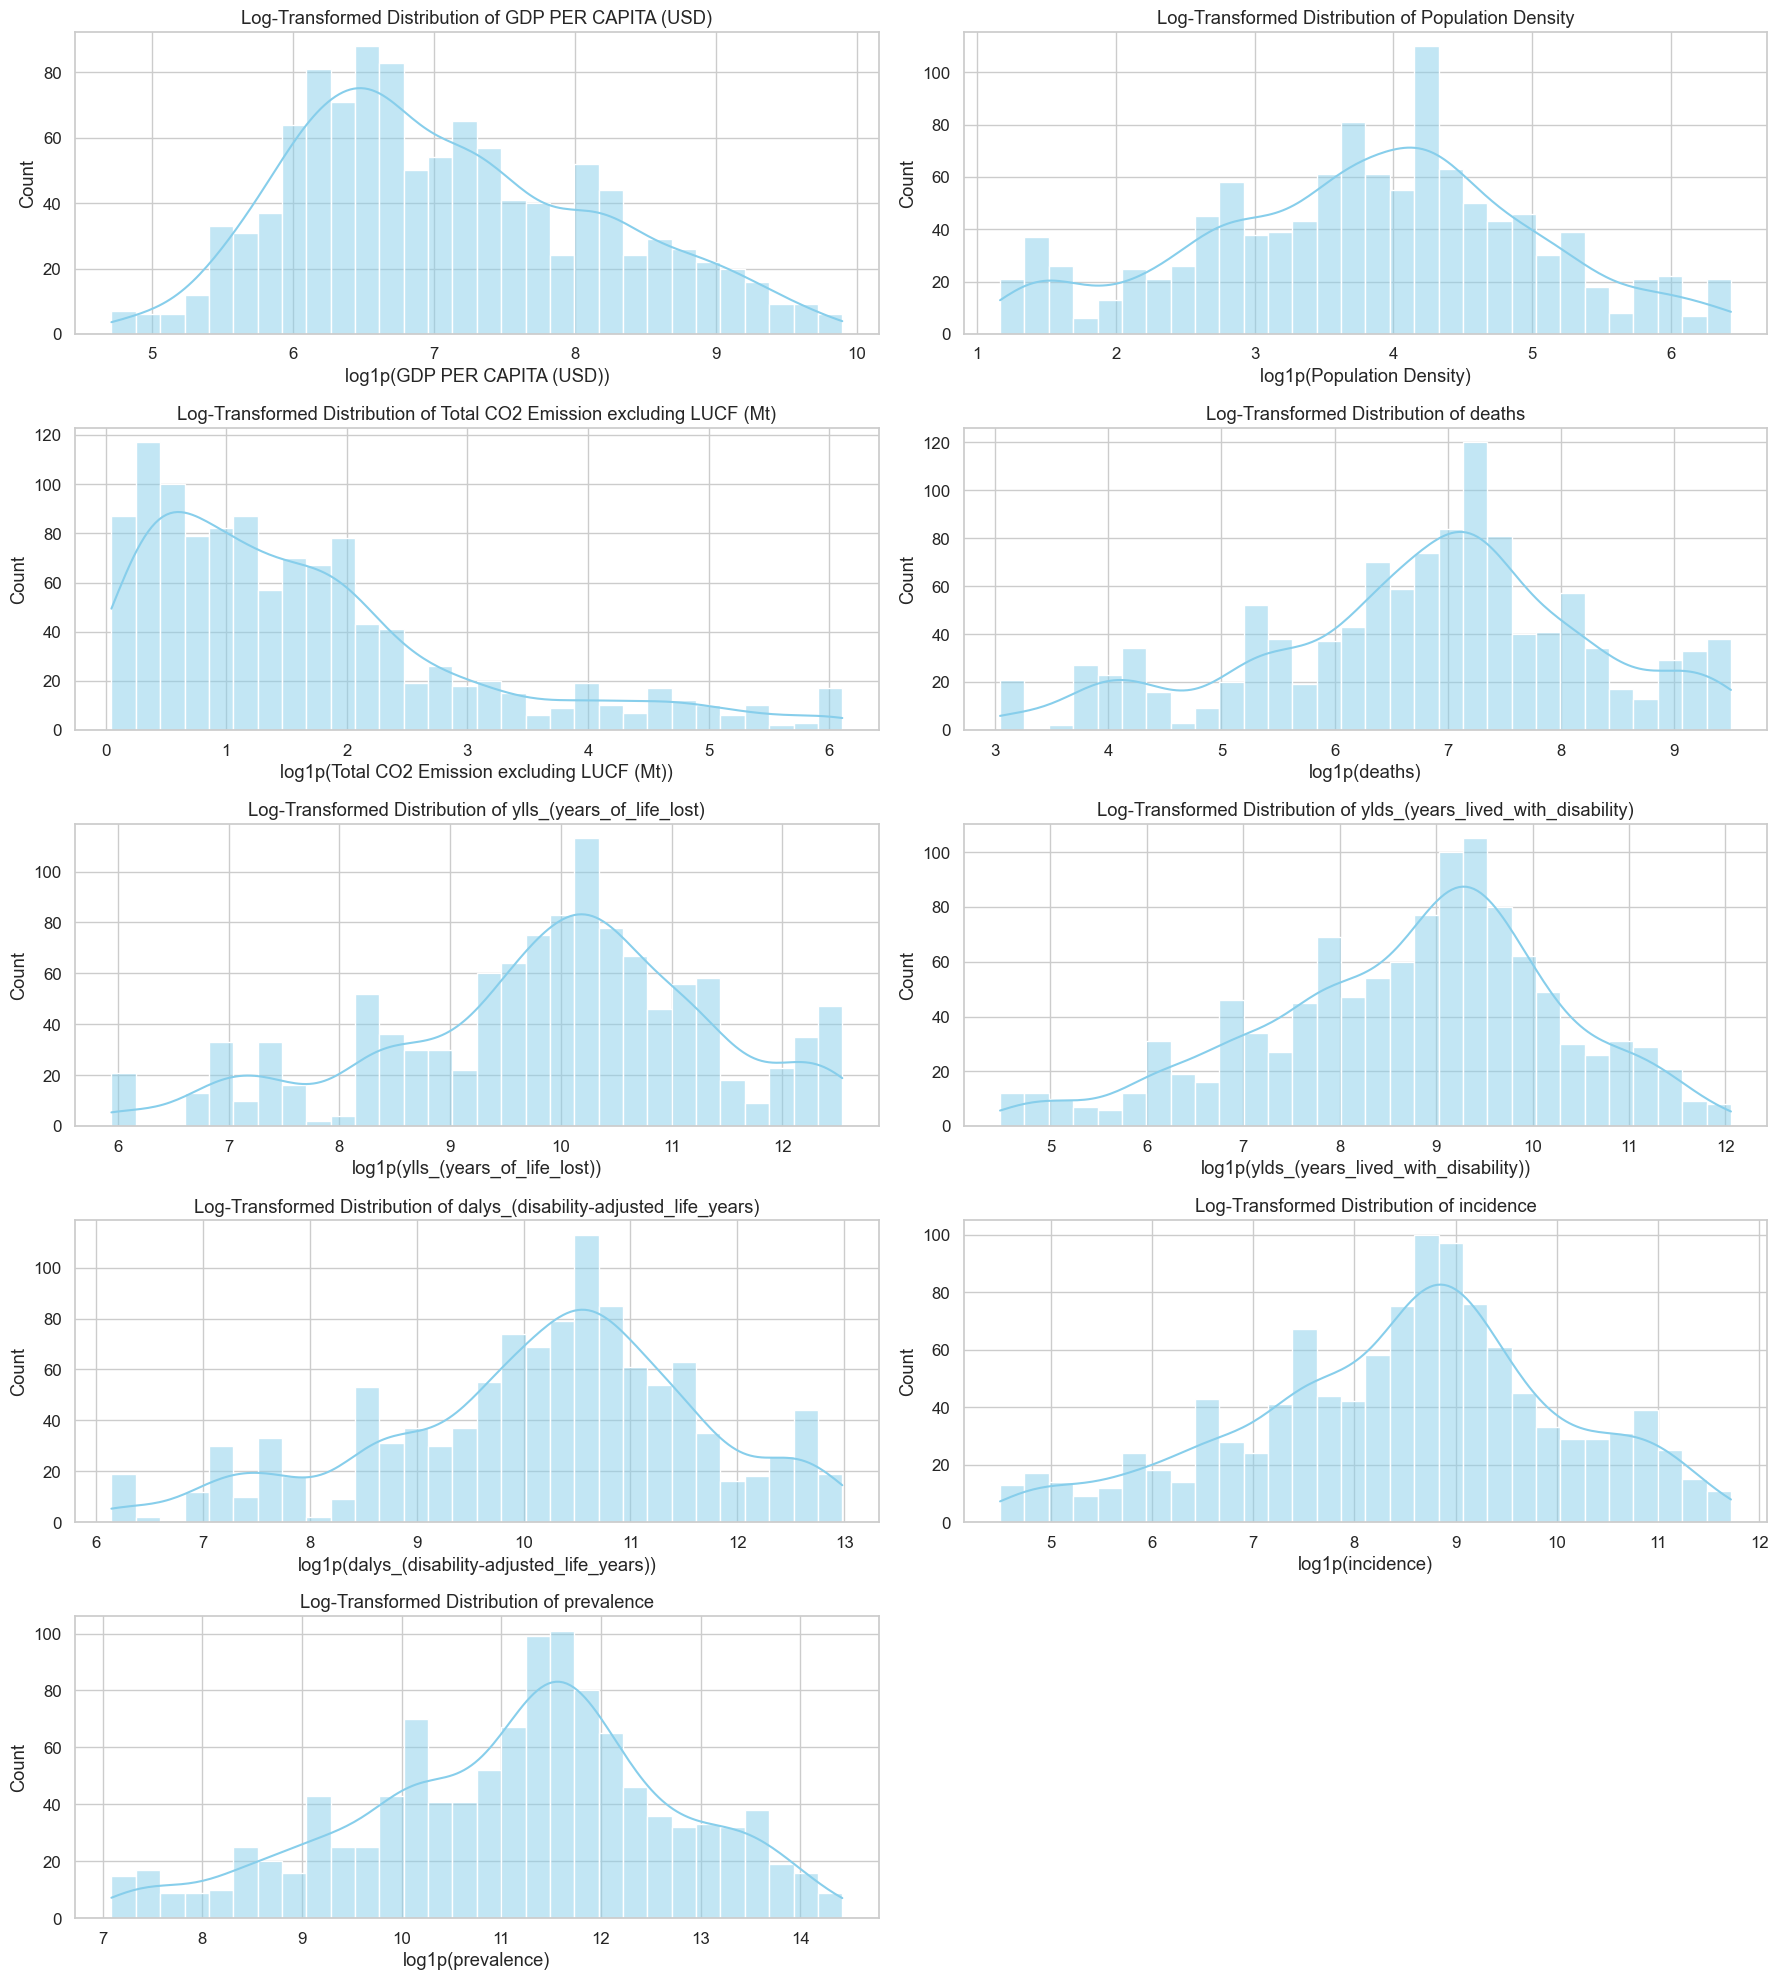

In [38]:


features_to_plot = [
    'GDP PER CAPITA (USD)',
    'Population Density',
    'Total CO2 Emission excluding LUCF (Mt)',
    'deaths',
    'ylls_(years_of_life_lost)',
    'ylds_(years_lived_with_disability)',
    'dalys_(disability-adjusted_life_years)',
    'incidence',
    'prevalence'
]

# Set up subplots
n_features = len(features_to_plot)
ncols = 2
nrows = (n_features + 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    ax = axes[i]
    data = merged_df[feature].dropna()
    data_log = np.log1p(data)  # log(x + 1)

    sns.histplot(data_log, kde=True, bins=30, ax=ax, color='skyblue')
    ax.set_title(f'Log-Transformed Distribution of {feature}')
    ax.set_xlabel(f'log1p({feature})')
    ax.set_ylabel('Count')

# Clean up any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [39]:
# 10. Normalize COPD Burden per 100,000
##############################################################################
merged_df['DALYs_per_100k'] = (
    merged_df['dalys_(disability-adjusted_life_years)'] / merged_df['Population'] * 100000
)
merged_df['Deaths_per_100k'] = (
    merged_df['deaths'] / merged_df['Population'] * 100000
)

In [40]:
# Step 1: Detect year range
min_year = merged_df['year'].min()
max_year = merged_df['year'].max()

# Step 2: Define features to compare
rate_features = [
    'DALYs_per_100k', 'Deaths_per_100k',
    'pm25_DTH',  # substitute with your actual column name
    'smoking_DTH'
]

# Step 3: Filter for min and max year
change_df = merged_df[merged_df['year'].isin([min_year, max_year])].copy()

# Step 4: Group and unstack
region_changes = change_df.groupby(['Sub-Region', 'year'])[rate_features].mean().unstack()

# Step 5: Use xs() to slice by year from the second level of column index
before = region_changes.xs(min_year, level=1, axis=1)
after = region_changes.xs(max_year, level=1, axis=1)

# Step 6: Calculate percent change
region_change_pct = ((after - before) / before) * 100
region_change_pct.index.name = f"Sub-Region ({min_year}–{max_year})"
region_change_pct.columns.name = "Metric"


region_change_pct


Metric                  DALYs_per_100k  Deaths_per_100k   pm25_DTH  \
Sub-Region (2000–2020)                                               
Eastern Africa               -7.479512       -12.846330  67.453348   
Middle Africa               -17.487392       -24.323870  90.440487   
Northern Africa              21.005526        20.248406  35.666156   
Southern Africa              -4.726812        -9.569522  28.627968   
Western Africa                1.472691        -3.973731  85.624212   

Metric                  smoking_DTH  
Sub-Region (2000–2020)               
Eastern Africa            19.404255  
Middle Africa             45.051784  
Northern Africa           35.066372  
Southern Africa          -12.156357  
Western Africa            30.526770

In [41]:
# 12. Stratified Comparison: High vs. Low Pollution
##############################################################################
# If you want to stratify by PM2.5 mortality (pm25_DTH) or concentration (pm25_DALY),
# pick the relevant column
pollution_median = merged_df['pm25_DTH'].median()  # or pm25_DALY
merged_df['Pollution_Group'] = np.where(
    merged_df['pm25_DTH'] > pollution_median, 'High PM', 'Low PM'
)

stratified_summary = merged_df.groupby('Pollution_Group')[
    ['DALYs_per_100k', 'Deaths_per_100k', 'smoking_DTH', 'household_pollution_DTH']
].mean()

stratified_summary

DALYs_per_100k  Deaths_per_100k  smoking_DTH  \
Pollution_Group                                                 
High PM              309.211083        10.370306   741.318584   
Low PM               395.283484        13.855526   122.163445   

                 household_pollution_DTH  
Pollution_Group                           
High PM                      1379.495575  
Low PM                        318.769772

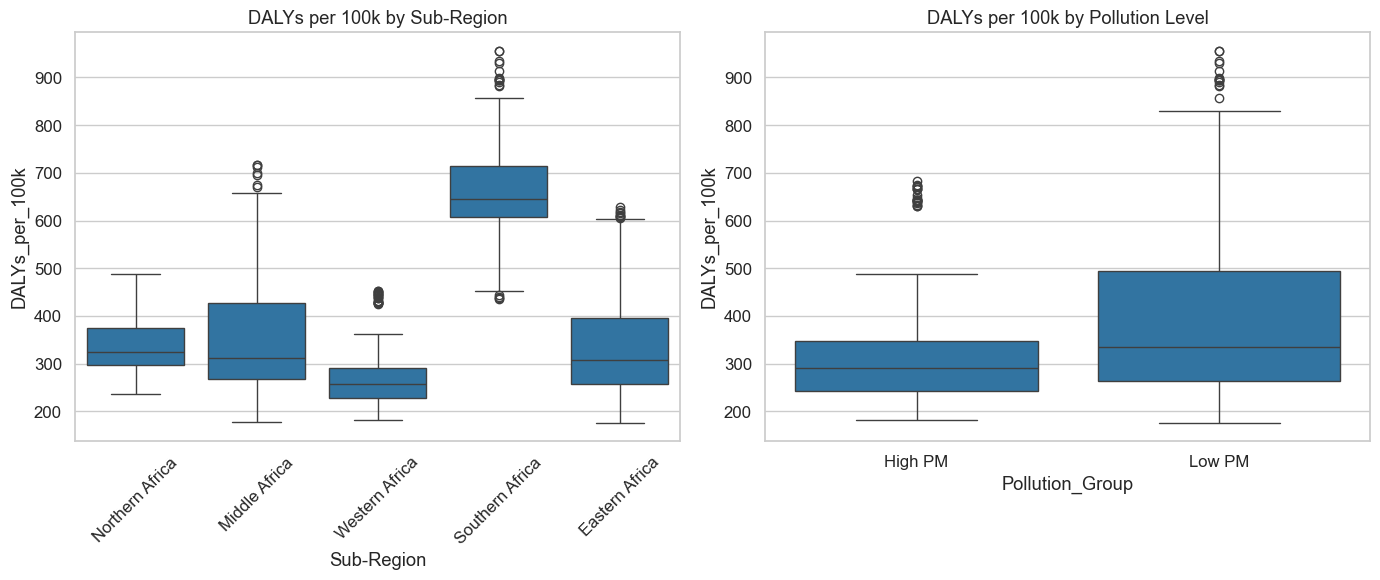

In [42]:
# 13. Boxplots of DALYs by Region & Pollution Level
##############################################################################
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=merged_df, x='Sub-Region', y='DALYs_per_100k')
plt.xticks(rotation=45)
plt.title('DALYs per 100k by Sub-Region')

plt.subplot(1, 2, 2)
sns.boxplot(data=merged_df, x='Pollution_Group', y='DALYs_per_100k')
plt.title('DALYs per 100k by Pollution Level')
plt.tight_layout()
plt.show()